In [19]:
#Notes#

#EPA website: https://epa.maps.arcgis.com/apps/webappviewer/index.html?id=5f239fd3e72f424f98ef3d5def547eb5&extent=-146.2334,13.1913,-46.3896,56.5319

#PM 10 is 81102
#PM 2.5 is 88101

#Clovis: aqs_site_06-019-5001_81102.csv
#Madera: aqs_site_06-039-2010_81102.csv
#Table Mountain: aqs_site_06-019-0500_88101.csv
#Cocoran: aqs_site_06-031-0004_88101.csv
#Sacramento 1309 T Street: aqs_site_06-067-0010_88101.csv
#Woodland: aqs_site_06-113-1003_88101.csv


#plt.plot(kind="bar",stacked=True,figsize=(10,8))

##green + black is pm ten. stack green on black to get total mass conc. breaks down what is coarse and whats pm 2.5
#pm 2.5 / pm 10 gets fraction of pm 2.5 normalizes to look at change in fraction 


In [20]:
#Uploading packaged
import numpy as np
import pylab as pl
import pandas as pd
import datetime as dt
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mp

In [21]:
#reading in csvs#
#clovis
clovis_pm10='aqs_site_06-019-5001_81102.csv'
clovis_pm25='aqs_site_06-019-5001_88101.csv'

#madera
madera_pm10='aqs_site_06-039-2010_81102.csv'
madera_pm25='aqs_site_06-039-2010_88101.csv'

#Table Mountain
tm_pm10='aqs_site_06-019-0500_81102.csv'
tm_pm25='aqs_site_06-019-0500_88101.csv'

#cocoran
cocoran_pm10='aqs_site_06-031-0004_81102.csv'
cocoran_pm25='aqs_site_06-031-0004_88101.csv'

#Sacramento
sac1309_pm10='aqs_site_06-067-0010_81102.csv'
sac1309_pm25='aqs_site_06-067-0010_88101.csv'

#woodland
woodland_pm10='aqs_site_06-113-1003_81102.csv'
woodland_pm25='aqs_site_06-113-1003_88101.csv'

#saving csv file in a dataframe#

#clovis
clovis_pm10_df=pd.read_csv(clovis_pm10)
clovis_pm25_df=pd.read_csv(clovis_pm25)

#madera
madera_pm10_df=pd.read_csv(madera_pm10)
madera_pm25_df=pd.read_csv(madera_pm25)

#Table Mountain
tm_pm10_df=pd.read_csv(tm_pm10)
tm_pm25_df=pd.read_csv(tm_pm25)

#cocoran
cocoran_pm10_df=pd.read_csv(cocoran_pm10)
cocoran_pm25_df=pd.read_csv(cocoran_pm25)

#Sacramento
sac1309_pm10_df=pd.read_csv(sac1309_pm10)
sac1309_pm25_df=pd.read_csv(sac1309_pm25)

#Woodland
woodland_pm10_df=pd.read_csv(woodland_pm10)
woodland_pm25_df=pd.read_csv(woodland_pm25)

In [22]:
#not yearly data PM 2.5
woodland_pm25_ny=pd.read_csv(woodland_pm25)
sac1309_pm25_ny=pd.read_csv(sac1309_pm25)
cocoran_pm25_ny=pd.read_csv(cocoran_pm25)
tm_pm25_ny=pd.read_csv(tm_pm25)
madera_pm25_ny=pd.read_csv(madera_pm25)
clovis_pm25_ny=pd.read_csv(clovis_pm25)

#datetime
woodland_pm25_ny['datetime_local']=pd.to_datetime(woodland_pm25_ny.datetime_local)
sac1309_pm25_ny['datetime_local']=pd.to_datetime(sac1309_pm25_ny.datetime_local)
clovis_pm25_ny['datetime_local']=pd.to_datetime(clovis_pm25_ny.datetime_local)
cocoran_pm25_ny['datetime_local']=pd.to_datetime(cocoran_pm25_ny.datetime_local)
tm_pm25_ny['datetime_local']=pd.to_datetime(tm_pm25_ny.datetime_local)
madera_pm25_ny['datetime_local']=pd.to_datetime(madera_pm25_ny.datetime_local)



In [23]:
#saving datetime CM and PM 10
clovis_pm10_df['datetime_local']=pd.to_datetime(clovis_pm10_df.datetime_local)
madera_pm10_df['datetime_local']=pd.to_datetime(madera_pm10_df.datetime_local)
tm_pm10_df['datetime_local']=pd.to_datetime(tm_pm10_df.datetime_local)
cocoran_pm10_df['datetime_local']=pd.to_datetime(cocoran_pm10_df.datetime_local)
sac1309_pm10_df['datetime_local']=pd.to_datetime(sac1309_pm10_df.datetime_local)
woodland_pm10_df['datetime_local']=pd.to_datetime(woodland_pm10_df.datetime_local)

#saving datetime PM 2.5
clovis_pm25_df['datetime_local']=pd.to_datetime(clovis_pm25_df.datetime_local)
madera_pm25_df['datetime_local']=pd.to_datetime(madera_pm25_df.datetime_local)
tm_pm25_df['datetime_local']=pd.to_datetime(tm_pm25_df.datetime_local)
cocoran_pm25_df['datetime_local']=pd.to_datetime(cocoran_pm25_df.datetime_local)
sac1309_pm25_df['datetime_local']=pd.to_datetime(sac1309_pm25_df.datetime_local)
woodland_pm25_df['datetime_local']=pd.to_datetime(woodland_pm25_df.datetime_local)


In [25]:
#Calculating Coarse Data

clovis_pm10_df['Coarse_PM'] = clovis_pm10_df.sample_measurement - clovis_pm25_df.sample_measurement
madera_pm10_df['Coarse_PM'] = madera_pm10_df.sample_measurement - madera_pm25_df.sample_measurement
tm_pm10_df['Coarse_PM'] = tm_pm10_df.sample_measurement - tm_pm25_df.sample_measurement
cocoran_pm10_df['Coarse_PM'] = cocoran_pm10_df.sample_measurement - cocoran_pm25_df.sample_measurement
sac1309_pm10_df['Coarse_PM'] = sac1309_pm10_df.sample_measurement - sac1309_pm25_df.sample_measurement
woodland_pm10_df['Coarse_PM'] = woodland_pm10_df.sample_measurement - woodland_pm25_df.sample_measurement


In [26]:
#Making year column CM
clovis_pm10_df['year']=clovis_pm10_df.datetime_local.dt.year
madera_pm10_df['year']=madera_pm10_df.datetime_local.dt.year
tm_pm10_df['year']=tm_pm10_df.datetime_local.dt.year
cocoran_pm10_df['year']=cocoran_pm10_df.datetime_local.dt.year
sac1309_pm10_df['year']=sac1309_pm10_df.datetime_local.dt.year
woodland_pm10_df['year']=woodland_pm10_df.datetime_local.dt.year

#Making year column PM 2.5
clovis_pm25_df['year']=clovis_pm25_df.datetime_local.dt.year
madera_pm25_df['year']=madera_pm25_df.datetime_local.dt.year
tm_pm25_df['year']=tm_pm25_df.datetime_local.dt.year
cocoran_pm25_df['year']=cocoran_pm25_df.datetime_local.dt.year
sac1309_pm25_df['year']=sac1309_pm25_df.datetime_local.dt.year
woodland_pm25_df['year']=woodland_pm25_df.datetime_local.dt.year

#Calculating annuals CM
annual_pm_clovis=clovis_pm10_df.groupby('year').mean().reset_index()
annual_pm_madera=madera_pm10_df.groupby('year').mean().reset_index()
annual_pm_tm=tm_pm10_df.groupby('year').mean().reset_index()
annual_pm_cocoran=cocoran_pm10_df.groupby('year').mean().reset_index()
annual_pm_sac1309=sac1309_pm10_df.groupby('year').mean().reset_index()
annual_pm_woodland=woodland_pm10_df.groupby('year').mean().reset_index()

#Calculating annuals PM 2.5
clovis_pm25_df=clovis_pm25_df.groupby('year').mean().reset_index()
madera_pm25_df=madera_pm25_df.groupby('year').mean().reset_index()
tm_pm25_df=tm_pm25_df.groupby('year').mean().reset_index()
cocoran_pm25_df=cocoran_pm25_df.groupby('year').mean().reset_index()
sac1309_pm25_df=sac1309_pm25_df.groupby('year').mean().reset_index()
woodland_pm25_df=woodland_pm25_df.groupby('year').mean().reset_index()



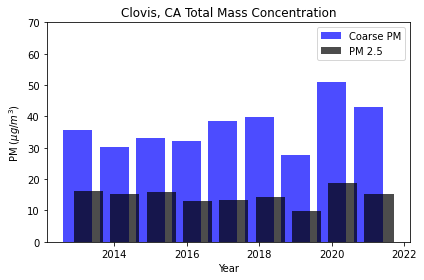

In [28]:
#Plotting PM 2.5 against CM to see total mass concentration 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm_clovis['year'], annual_pm_clovis['sample_measurement'], alpha=opacity, color='b', label='Coarse PM')
plt.bar(clovis_pm25_df['year'] + bar_width, clovis_pm25_df['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylabel('PM ($\mu g/m^3$)')
plt.ylim(0,70)
plt.title("Clovis, CA Total Mass Concentration")
plt.legend()
plt.tight_layout()
plt.show()

#set the heighte equal to the highest height value given to make a stacked bar plot

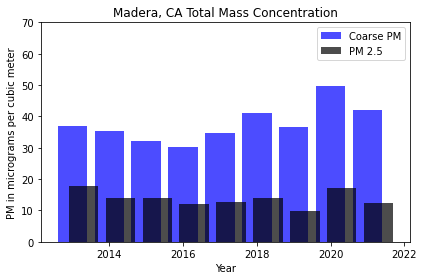

In [9]:
#Plotting PM 2.5 against CM to see total mass concentration 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm_madera['year'], annual_pm_madera['sample_measurement'], alpha=opacity, color='b', label='Coarse PM')
plt.bar(madera_pm25_df['year'] + bar_width, madera_pm25_df['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Madera, CA Total Mass Concentration")
plt.legend()
plt.tight_layout()
plt.show()


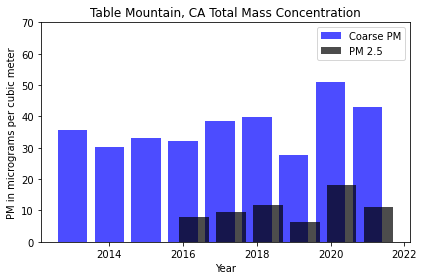

In [10]:
#Plotting PM 2.5 against CM to see total mass concentration 
#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm_tm['year'], annual_pm_tm['sample_measurement'], alpha=opacity, color='b', label='Coarse PM')
plt.bar(tm_pm25_df['year'] + bar_width, tm_pm25_df['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Table Mountain, CA Total Mass Concentration")
plt.legend()
plt.tight_layout()
plt.show()


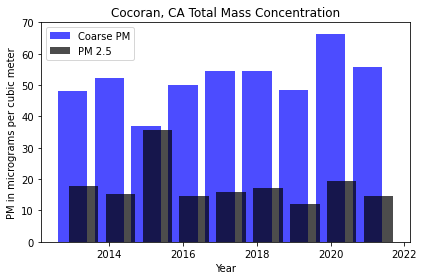

In [11]:
#Plotting PM 2.5 against CM to see total mass concentration 
#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm_cocoran['year'], annual_pm_cocoran['sample_measurement'], alpha=opacity, color='b', label='Coarse PM')
plt.bar(cocoran_pm25_df['year'] + bar_width, cocoran_pm25_df['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Cocoran, CA Total Mass Concentration")
plt.legend()
plt.tight_layout()
plt.show()


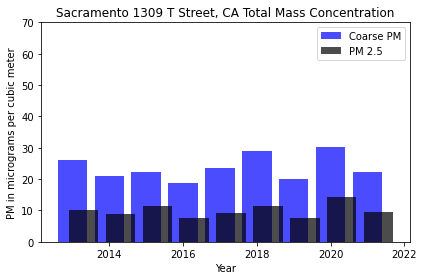

In [12]:
#Plotting PM 2.5 against CM to see total mass concentration 
#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm_sac1309['year'], annual_pm_sac1309['sample_measurement'], alpha=opacity, color='b', label='Coarse PM')
plt.bar(sac1309_pm25_df['year'] + bar_width, sac1309_pm25_df['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Sacramento 1309 T Street, CA Total Mass Concentration")
plt.legend()
plt.tight_layout()
plt.show()


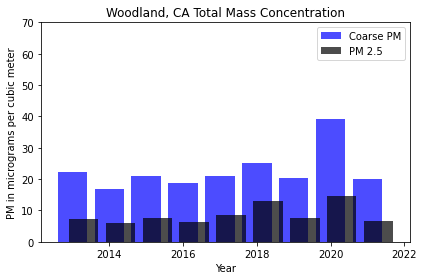

In [13]:
#Plotting PM 2.5 against CM to see total mass concentration 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(annual_pm_woodland['year'], annual_pm_woodland['sample_measurement'], alpha=opacity, color='b', label='Coarse PM')
plt.bar(woodland_pm25_df['year'] + bar_width, woodland_pm25_df['sample_measurement'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,70)
plt.title("Woodland, CA Total Mass Concentration")
plt.legend()
plt.tight_layout()
plt.show()


In [142]:
#making data frames
w1=annual_pm_woodland['Coarse_PM']
w2=annual_pm_woodland['sample_measurement']
years=annual_pm_woodland['year']

cl1=annual_pm_clovis['Coarse_PM']
cl2=annual_pm_clovis['sample_measurement']

co1=annual_pm_cocoran['Coarse_PM']
co2=annual_pm_cocoran['sample_measurement']

t1=annual_pm_tm['Coarse_PM']
t2=annual_pm_tm['sample_measurement']

s1=annual_pm_sac1309['Coarse_PM']
s2=annual_pm_sac1309['sample_measurement']

m1=annual_pm_madera['Coarse_PM']
m2=annual_pm_madera['sample_measurement']

t2


0    35.649123
1    30.351852
2    33.166667
3    32.250000
4    38.525976
5    39.915684
6    27.659995
7    51.099442
8    43.107143
Name: sample_measurement, dtype: float64

In [114]:
#years
b_pos = np.arange(len(years))


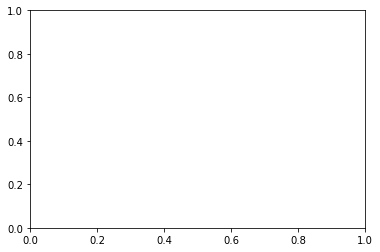

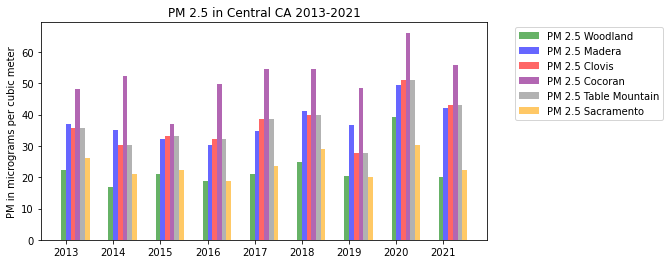

In [176]:
#PLOTTING
fig, ax = plt.subplots()
fig= plt.figure(figsize=(8,4))
bar_width = .1
opacity=0.6

#woodland
#plt.bar(b_pos, w1, bar_width, alpha=.3, color='g', label='Coarse PM Woodland')

plt.bar(b_pos + bar_width, w2, bar_width, alpha=opacity, color='g', label='PM 2.5 Woodland')

#madera
#plt.bar(b_pos + (2*bar_width), m1, alpha=.3, color='b', label='Madera PM Clovis')

plt.bar(b_pos + (2*bar_width), m2, bar_width, alpha=opacity, color='b', label='PM 2.5 Madera')

#clovis
#plt.bar(b_pos + (4*bar_width), cl1, alpha=.3, color='red', label='Coarse PM Clovis')

plt.bar(b_pos + (3*bar_width), cl2, bar_width, alpha=opacity, color='red', label='PM 2.5 Clovis')

#cocoran
#plt.bar(b_pos + (6*bar_width), co1, alpha=.3, color='purple', label='Coarse PM Cocoran')

plt.bar(b_pos + (4*bar_width), co2, bar_width, alpha=opacity, color='purple', label='PM 2.5 Cocoran')

#tm
#plt.bar(b_pos + (8*bar_width), t1, alpha=.3, color='gray', label='Coarse PM Table Mountain')

plt.bar(b_pos + (5*bar_width), t2, bar_width, alpha=opacity, color='gray', label='PM 2.5 Table Mountain')

#sac1309
#plt.bar(b_pos + (10*bar_width), s1, alpha=.3, color='orange', label='Coarse PM Sacramento')

plt.bar(b_pos + (6*bar_width), s2, bar_width, alpha=opacity, color='orange', label='PM 2.5 Sacramento')

plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.ylim=(0,50)
plt.xticks(b_pos + 1.5*bar_width, years)
plt.ylabel('PM in micrograms per cubic meter')
plt.title("PM 2.5 in Central CA 2013-2021")
#$figsize(5,7)
plt.show()

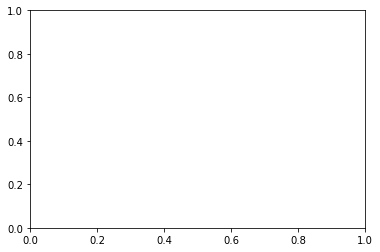

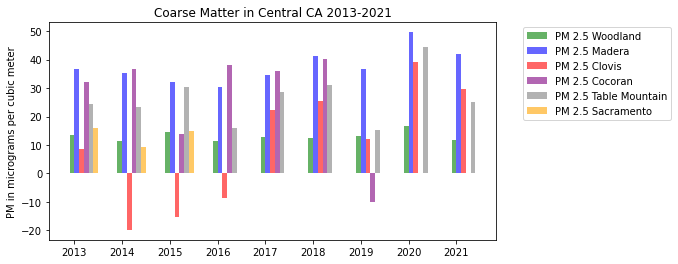

In [181]:
#PLOTTING
fig, ax = plt.subplots()
fig= plt.figure(figsize=(8,4))
bar_width = .1
opacity=0.6

#woodland
#plt.bar(b_pos, w1, bar_width, alpha=.3, color='g', label='Coarse PM Woodland')

plt.bar(b_pos + bar_width, w1, bar_width, alpha=opacity, color='g', label='PM 2.5 Woodland')

#madera
#plt.bar(b_pos + (2*bar_width), m1, alpha=.3, color='b', label='Madera PM Clovis')

plt.bar(b_pos + (2*bar_width), m2, bar_width, alpha=opacity, color='b', label='PM 2.5 Madera')

#clovis
#plt.bar(b_pos + (4*bar_width), cl1, alpha=.3, color='red', label='Coarse PM Clovis')

plt.bar(b_pos + (3*bar_width), cl1, bar_width, alpha=opacity, color='red', label='PM 2.5 Clovis')

#cocoran
#plt.bar(b_pos + (6*bar_width), co1, alpha=.3, color='purple', label='Coarse PM Cocoran')

plt.bar(b_pos + (4*bar_width), co1, bar_width, alpha=opacity, color='purple', label='PM 2.5 Cocoran')

#tm
#plt.bar(b_pos + (8*bar_width), t1, alpha=.3, color='gray', label='Coarse PM Table Mountain')

plt.bar(b_pos + (5*bar_width), t1, bar_width, alpha=opacity, color='gray', label='PM 2.5 Table Mountain')

#sac1309
#plt.bar(b_pos + (10*bar_width), s1, alpha=.3, color='orange', label='Coarse PM Sacramento')

plt.bar(b_pos + (6*bar_width), s1, bar_width, alpha=opacity, color='orange', label='PM 2.5 Sacramento')

plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.ylim=(0,60)
plt.xticks(b_pos + 1.5*bar_width, years)
plt.ylabel('PM in micrograms per cubic meter')
plt.title("Coarse Matter in Central CA 2013-2021")
plt.show()

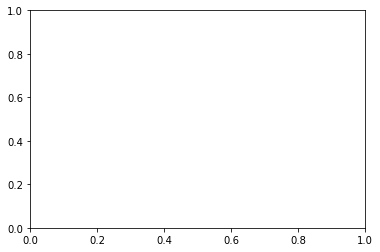

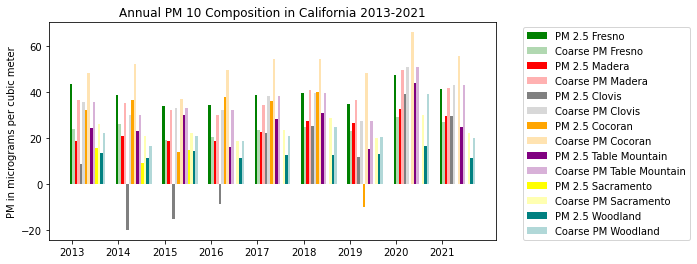

In [215]:

#PLOTTING
fig, ax = plt.subplots()
fig= plt.figure(figsize=(8,4))
bar_width = .055
#opacity=0.6


#fresno
plt.bar(b_pos + bar_width, df_25, bar_width, alpha=1, color='g', label='PM 2.5 Fresno')
#fresno
plt.bar(b_pos + (2*bar_width), df_coarse, bar_width, alpha=.3, color='g', label='Coarse PM Fresno')


#madera
plt.bar(b_pos + (3*bar_width), m1, bar_width, alpha=1, color='red', label='PM 2.5 Madera')
#madera
plt.bar(b_pos + (4*bar_width), m2, bar_width, alpha=.3, color='red', label='Coarse PM Madera')

#clovis
plt.bar(b_pos + (5*bar_width), cl1, bar_width, alpha=1, color='gray', label='PM 2.5 Clovis')
#clovis
plt.bar(b_pos + (6*bar_width), cl2, bar_width, alpha=.3, color='gray', label='Coarse PM Clovis')


#cocoran
plt.bar(b_pos + (7*bar_width), co1, bar_width, alpha=1, color='orange', label='PM 2.5 Cocoran')
#cocoran
plt.bar(b_pos + (8*bar_width), co2, bar_width, alpha=.3, color='orange', label='Coarse PM Cocoran')


#tm
plt.bar(b_pos + (9*bar_width), t1, bar_width, alpha=1, color='purple', label='PM 2.5 Table Mountain')
#tm
plt.bar(b_pos + (10*bar_width), t2, bar_width, alpha=.3, color='purple', label='Coarse PM Table Mountain')


#sac 
plt.bar(b_pos + (11*bar_width), s1, bar_width, alpha=1, color='yellow', label='PM 2.5 Sacramento')
#sac
plt.bar(b_pos + (12*bar_width), s2, bar_width, alpha=.3, color='yellow', label='Coarse PM Sacramento')

#woodland
plt.bar(b_pos + (13*bar_width), w1, bar_width, alpha=1, color='teal', label='PM 2.5 Woodland')
#woodland
plt.bar(b_pos + (14*bar_width), w2, bar_width, alpha=.3, color='teal', label='Coarse PM Woodland')


plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.ylim=(0,60)
plt.xticks(b_pos + 1.5*bar_width, years)
plt.ylabel('PM in micrograms per cubic meter')
plt.title("Annual PM 10 Composition in California 2013-2021")
plt.show()

In [209]:
#reading in csv
aqs_pm10='aqs_site_06-019-0011_81102.csv'
aqs_pm25='aqs_site_06-019-0011_88101.csv'

#saving csv file in a dataframe
df_pm10=pd.read_csv(aqs_pm10)
df_pm25=pd.read_csv(aqs_pm25)

#saving datetime
df_pm10['datetime_local']=pd.to_datetime(df_pm10.datetime_local)
df_pm25['datetime_local']=pd.to_datetime(df_pm25.datetime_local)

#adding a year column
df_pm10['year']=df_pm10.datetime_local.dt.year 
df_pm25['year']=df_pm25.datetime_local.dt.year

#making cpm area
df_pm10['Coarse_PM'] = df_pm10.sample_measurement - df_pm25.sample_measurement

#annuals for year 
df_pm10_annual=df_pm10.groupby('year').mean().reset_index()
df_pm25_annual=df_pm10.groupby('year').mean().reset_index()

#making data frames
df_coarse=df_pm10_annual['Coarse_PM']
df_25=df_pm25_annual['sample_measurement']
years=df_pm10_annual['year']

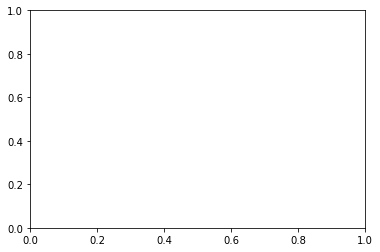

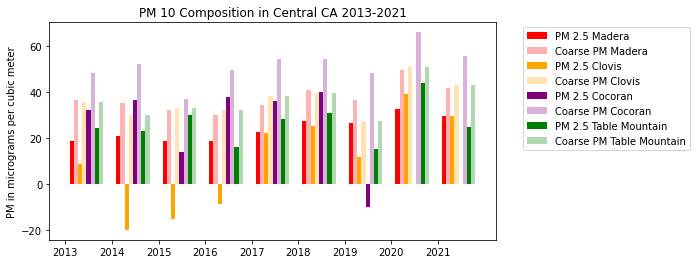

In [204]:

#PLOTTING
fig, ax = plt.subplots()
fig= plt.figure(figsize=(8,4))
bar_width = .09
#opacity=0.6


#woodland
#plt.bar(b_pos + bar_width, w1, bar_width, alpha=1, color='g', label='PM 2.5 Woodland')
#woodland
#plt.bar(b_pos + (2*bar_width), w2, bar_width, alpha=.3, color='g', label='Coarse PM Woodland')


#madera
plt.bar(b_pos + (3*bar_width), m1, bar_width, alpha=1, color='red', label='PM 2.5 Madera')
#madera
plt.bar(b_pos + (4*bar_width), m2, bar_width, alpha=.3, color='red', label='Coarse PM Madera')

#clovis
plt.bar(b_pos + (5*bar_width), cl1, bar_width, alpha=1, color='orange', label='PM 2.5 Clovis')
#clovis
plt.bar(b_pos + (6*bar_width), cl2, bar_width, alpha=.3, color='orange', label='Coarse PM Clovis')


#cocoran
plt.bar(b_pos + (7*bar_width), co1, bar_width, alpha=1, color='purple', label='PM 2.5 Cocoran')
#cocoran
plt.bar(b_pos + (8*bar_width), co2, bar_width, alpha=.3, color='purple', label='Coarse PM Cocoran')


#tm
plt.bar(b_pos + (9*bar_width), t1, bar_width, alpha=1, color='green', label='PM 2.5 Table Mountain')
#tm
plt.bar(b_pos + (10*bar_width), t2, bar_width, alpha=.3, color='green', label='Coarse PM Table Mountain')


#sac 
#plt.bar(b_pos + (11*bar_width), s1, bar_width, alpha=1, color='yellow', label='PM 2.5 Sacramento')
#sac
#plt.bar(b_pos + (12*bar_width), s2, bar_width, alpha=.3, color='yellow', label='Coarse PM Sacramento')


plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.ylim=(0,60)
plt.xticks(b_pos + 1.5*bar_width, years)
plt.ylabel('PM in micrograms per cubic meter')
plt.title("PM 10 Composition in Central CA 2013-2021")
plt.show()

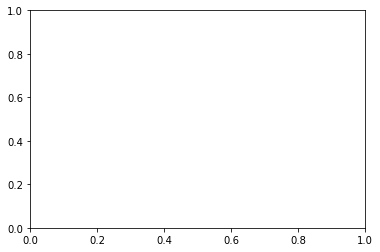

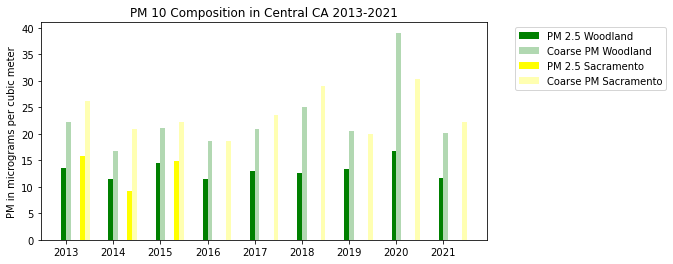

In [198]:

#PLOTTING
fig, ax = plt.subplots()
fig= plt.figure(figsize=(8,4))
bar_width = .1
#opacity=0.6


#woodland
plt.bar(b_pos + bar_width, w1, bar_width, alpha=1, color='g', label='PM 2.5 Woodland')
#woodland
plt.bar(b_pos + (2*bar_width), w2, bar_width, alpha=.3, color='g', label='Coarse PM Woodland')


#madera
#plt.bar(b_pos + (3*bar_width), m1, bar_width, alpha=1, color='red', label='PM 2.5 Madera')
#madera
#plt.bar(b_pos + (4*bar_width), m2, bar_width, alpha=.3, color='red', label='Coarse PM Madera')

#clovis
#plt.bar(b_pos + (5*bar_width), cl1, bar_width, alpha=1, color='gray', label='PM 2.5 Clovis')
#clovis
#plt.bar(b_pos + (6*bar_width), cl2, bar_width, alpha=.3, color='gray', label='Coarse PM Clovis')


#cocoran
#plt.bar(b_pos + (7*bar_width), co1, bar_width, alpha=1, color='orange', label='PM 2.5 Cocoran')
#cocoran
#plt.bar(b_pos + (8*bar_width), co2, bar_width, alpha=.3, color='orange', label='Coarse PM Cocoran')


#tm
#plt.bar(b_pos + (9*bar_width), t1, bar_width, alpha=1, color='purple', label='PM 2.5 Table Mountain')
#tm
#plt.bar(b_pos + (10*bar_width), t2, bar_width, alpha=.3, color='purple', label='Coarse PM Table Mountain')


#sac 
plt.bar(b_pos + (5*bar_width), s1, bar_width, alpha=1, color='yellow', label='PM 2.5 Sacramento')
#sac
plt.bar(b_pos + (6*bar_width), s2, bar_width, alpha=.3, color='yellow', label='Coarse PM Sacramento')


plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.ylim=(0,60)
plt.xticks(b_pos + 1.5*bar_width, years)
plt.ylabel('PM in micrograms per cubic meter')
plt.title("PM 10 Composition in Central CA 2013-2021")
plt.show()

In [ ]:
#Making the fraction 
clovis_y_10['PM Ratio 2.5 to 10 x'] = clovis_pm25_df.sample_measurement / clovis_y_10.sample_measurement

In [15]:
tm_pm10_df['PM Ratio 2.5 to 10'] = tm_pm25_df.sample_measurement / tm_pm10_df.sample_measurement

In [16]:
madera_pm10_df['PM Ratio 2.5 to 10'] = madera_pm25_df.sample_measurement / madera_pm10_df.sample_measurement

In [17]:
woodland_pm10_df['PM Ratio 2.5 to 10'] = woodland_pm25_df.sample_measurement / woodland_pm10_df.sample_measurement

In [18]:
cocoran_pm10_df['PM Ratio 2.5 to 10'] = cocoran_pm25_df.sample_measurement / cocoran_pm10_df.sample_measurement

In [19]:
sac1309_pm10_df['PM Ratio 2.5 to 10'] = sac1309_pm25_df.sample_measurement / sac1309_pm10_df.sample_measurement

In [20]:
#Plotting the annual fractions for the different sites in CA

In [21]:
clovis_y_10=clovis_pm10_df.groupby('year').mean().reset_index()
clovis_y_10

,year,sample_measurement,latitude,longitude,Coarse_PM
0,2013,35.649123,36.819449,-119.716433,8.762745
1,2014,30.351852,36.819449,-119.716433,-19.851852
2,2015,33.166667,36.819449,-119.716433,-15.266667
3,2016,32.250000,36.819449,-119.716433,-8.600000
4,2017,38.525976,36.819449,-119.716433,22.320499
5,2018,39.915684,36.819449,-119.716433,25.421738
6,2019,27.659995,36.819449,-119.716433,12.074049
7,2020,51.099442,36.819449,-119.716433,39.296536
8,2021,43.107143,36.819449,-119.716433,29.653041


In [22]:
madera_y=madera_pm10_df.groupby('year').mean().reset_index()

In [23]:
sac1309_y=sac1309_pm10_df.groupby('year').mean().reset_index()

In [24]:
cocoran_y=cocoran_pm10_df.groupby('year').mean().reset_index()

In [25]:
tm_y=tm_pm10_df.groupby('year').mean().reset_index()

tm_y

,year,sample_measurement,latitude,longitude,Coarse_PM,PM Ratio 2.5 to 10
0,2013,35.649123,36.819449,-119.716433,24.527273,0.436595
1,2014,30.351852,36.819449,-119.716433,23.222222,NaN
2,2015,33.166667,36.819449,-119.716433,30.350000,NaN
3,2016,32.250000,36.819449,-119.716433,16.083333,NaN
4,2017,38.525976,36.819449,-119.716433,28.566822,NaN
5,2018,39.915684,36.819449,-119.716433,30.945435,NaN
6,2019,27.659995,36.819449,-119.716433,15.321739,NaN
7,2020,51.099442,36.819449,-119.716433,44.274601,NaN
8,2021,43.107143,36.819449,-119.716433,24.977265,NaN


In [26]:
woodland_y=woodland_pm10_df.groupby('year').mean().reset_index()


NameError: name 'clovis_y' is not defined

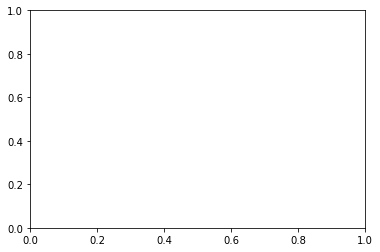

In [27]:
#Clovis
fg, ax=plt.subplots()
bar_width=0.3
plt.bar(clovis_y['year'], clovis_y['PM Ratio 2.5 to 10'], alpha=opacity, color='b', label='Coarse PM')
#plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,5)
plt.xlim(2012,2022)
plt.title("Clovis, CA Annual Fractions")
plt.legend()
plt.tight_layout()
plt.show()


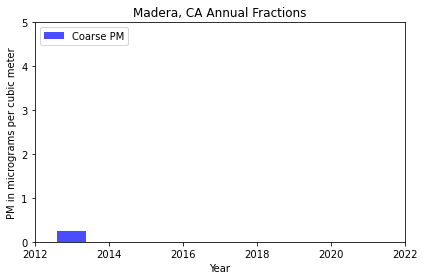

In [28]:
#Madera
fg, ax=plt.subplots()
bar_width=0.3
plt.bar(madera_y['year'], madera_y['PM Ratio 2.5 to 10'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,5)
plt.xlim(2012,2022)
plt.title("Madera, CA Annual Fractions")
plt.legend()
plt.tight_layout()
plt.show()


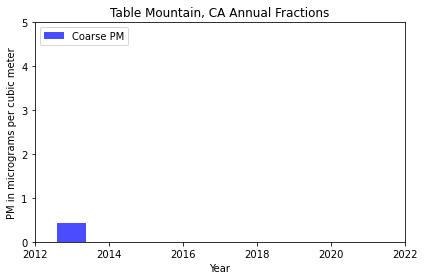

In [29]:
#tm
fg, ax=plt.subplots()
bar_width=0.3
plt.bar(tm_y['year'], tm_y['PM Ratio 2.5 to 10'], alpha=opacity, color='b', label='Coarse PM')
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,5)
plt.xlim(2012,2022)
plt.title("Table Mountain, CA Annual Fractions")
plt.legend()
plt.tight_layout()
plt.show()


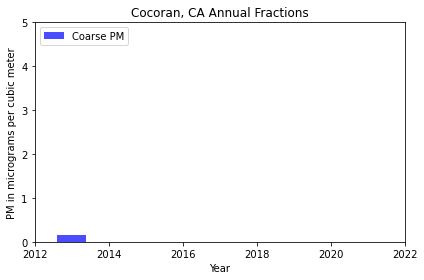

In [30]:
#cocoran
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_y['year'], cocoran_y['PM Ratio 2.5 to 10'], alpha=opacity, color='b', label='Coarse PM')
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,5)
plt.xlim(2012,2022)
plt.title("Cocoran, CA Annual Fractions")
plt.legend()
plt.tight_layout()
plt.show()


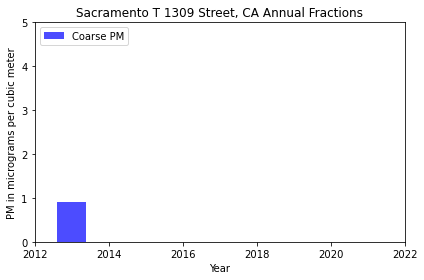

In [31]:
#sac1309
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_y['year'], sac1309_y['PM Ratio 2.5 to 10'], alpha=opacity, color='b', label='Coarse PM')
plt.plot(kind="bar",stacked=True)
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,5)
plt.xlim(2012,2022)
plt.title("Sacramento T 1309 Street, CA Annual Fractions")
plt.legend()
plt.tight_layout()
plt.show()


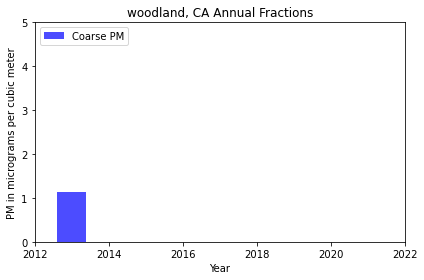

In [32]:
#woodland
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_y['year'], woodland_y['PM Ratio 2.5 to 10'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,5)
plt.xlim(2012,2022)
plt.title("woodland, CA Annual Fractions")
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
##Selecting times based off of dust season###

In [34]:
#Making month column PM 2.5
clovis_pm25_ny['month']=clovis_pm25_ny.datetime_local.dt.month
madera_pm25_ny['month']=madera_pm25_ny.datetime_local.dt.month
tm_pm25_ny['month']=tm_pm25_ny.datetime_local.dt.month
cocoran_pm25_ny['month']=cocoran_pm25_ny.datetime_local.dt.month
sac1309_pm25_ny['month']=sac1309_pm25_ny.datetime_local.dt.month
woodland_pm25_ny['month']=woodland_pm25_ny.datetime_local.dt.month

#Making month column PM 2.5
clovis_pm25_ny['month']=clovis_pm25_ny.datetime_local.dt.month
madera_pm25_ny['month']=madera_pm25_ny.datetime_local.dt.month
tm_pm25_ny['month']=tm_pm25_ny.datetime_local.dt.month
cocoran_pm25_ny['month']=cocoran_pm25_ny.datetime_local.dt.month
sac1309_pm25_ny['month']=sac1309_pm25_ny.datetime_local.dt.month
woodland_pm25_ny['month']=woodland_pm25_ny.datetime_local.dt.month

#saving datetime PM 2.5 months
clovis_pm25_ny['month']=clovis_pm25_ny.datetime_local.dt.month
madera_pm25_ny['month']=madera_pm25_ny.datetime_local.dt.month
sac1309_pm25_ny['month']=sac1309_pm25_ny.datetime_local.dt.month
tm_pm25_ny['month']=tm_pm25_ny.datetime_local.dt.month
cocoran_pm25_ny['month']=cocoran_pm25_ny.datetime_local.dt.month
woodland_pm25_ny['month']=woodland_pm25_ny.datetime_local.dt.month 



In [35]:
#not yearly data PM 10
woodland_pm10_ny=pd.read_csv(woodland_pm10)
sac1309_pm10_ny=pd.read_csv(sac1309_pm10)
cocoran_pm10_ny=pd.read_csv(cocoran_pm10)
tm_pm10_ny=pd.read_csv(tm_pm10)
madera_pm10_ny=pd.read_csv(madera_pm10)
clovis_pm10_ny=pd.read_csv(clovis_pm10)

#datetime PM 10
woodland_pm10_ny['datetime_local']=pd.to_datetime(woodland_pm10_ny.datetime_local)
sac1309_pm10_ny['datetime_local']=pd.to_datetime(sac1309_pm10_ny.datetime_local)
clovis_pm10_ny['datetime_local']=pd.to_datetime(clovis_pm10_ny.datetime_local)
cocoran_pm10_ny['datetime_local']=pd.to_datetime(cocoran_pm10_ny.datetime_local)
tm_pm10_ny['datetime_local']=pd.to_datetime(tm_pm10_ny.datetime_local)
madera_pm10_ny['datetime_local']=pd.to_datetime(madera_pm10_ny.datetime_local)

#Making month column PM 10
clovis_pm10_ny['month']=clovis_pm10_ny.datetime_local.dt.month
madera_pm10_ny['month']=madera_pm10_ny.datetime_local.dt.month
tm_pm10_ny['month']=tm_pm10_ny.datetime_local.dt.month
cocoran_pm10_ny['month']=cocoran_pm10_ny.datetime_local.dt.month
sac1309_pm10_ny['month']=sac1309_pm10_ny.datetime_local.dt.month
woodland_pm10_ny['month']=woodland_pm10_ny.datetime_local.dt.month

#saving datetime pm 10 months 
madera_pm10_ny['month']=madera_pm10_ny.datetime_local.dt.month
tm_pm10_ny['month']=tm_pm10_ny.datetime_local.dt.month
cocoran_pm10_ny['month']=cocoran_pm10_ny.datetime_local.dt.month
sac1309_pm10_ny['month']=sac1309_pm10_ny.datetime_local.dt.month
woodland_pm10_ny['month']=woodland_pm10_ny.datetime_local.dt.month
clovis_pm10_ny['month']= clovis_pm10_ny.datetime_local.dt.month

#pm10_2014 = df_pm10[df_pm10['datetime_local'].dt.year == 2014]
#clovis_pm10_ny.groupby(pd.Grouper(key = 'month')).mean()

In [36]:
#Selecting select dates
#Madera pm 10
madera_pm10_dusts1= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2013-09-01') & (madera_pm10_ny['datetime_local'] < '2013-12-01')]
madera_pm10_dusts2= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2014-09-01') & (madera_pm10_ny['datetime_local'] < '2014-12-01')]
madera_pm10_dusts3= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2015-09-01') & (madera_pm10_ny['datetime_local'] < '2015-12-01')]
madera_pm10_dusts4= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2016-09-01') & (madera_pm10_ny['datetime_local'] < '2016-12-01')]
madera_pm10_dusts5= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2017-09-01') & (madera_pm10_ny['datetime_local'] < '2017-12-01')]
madera_pm10_dusts6= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2018-09-01') & (madera_pm10_ny['datetime_local'] < '2018-12-01')]
madera_pm10_dusts7= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2019-09-01') & (madera_pm10_ny['datetime_local'] < '2019-12-01')]
madera_pm10_dusts8= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2020-09-01') & (madera_pm10_ny['datetime_local'] < '2020-12-01')]
madera_pm10_dusts9= madera_pm10_ny[(madera_pm10_ny['datetime_local'] > '2021-09-01') & (madera_pm10_ny['datetime_local'] < '2021-12-01')]

In [37]:
#madera pm 2.5
madera_pm25_dusts1= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2013-09-01') & (madera_pm25_ny['datetime_local'] < '2013-12-01')]
madera_pm25_dusts2= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2014-09-01') & (madera_pm25_ny['datetime_local'] < '2014-12-01')]
madera_pm25_dusts3= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2015-09-01') & (madera_pm25_ny['datetime_local'] < '2015-12-01')]
madera_pm25_dusts4= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2016-09-01') & (madera_pm25_ny['datetime_local'] < '2016-12-01')]
madera_pm25_dusts5= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2017-09-01') & (madera_pm25_ny['datetime_local'] < '2017-12-01')]
madera_pm25_dusts6= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2018-09-01') & (madera_pm25_ny['datetime_local'] < '2018-12-01')]
madera_pm25_dusts7= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2019-09-01') & (madera_pm25_ny['datetime_local'] < '2019-12-01')]
madera_pm25_dusts8= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2020-09-01') & (madera_pm25_ny['datetime_local'] < '2020-12-01')]
madera_pm25_dusts9= madera_pm25_ny[(madera_pm25_ny['datetime_local'] > '2021-09-01') & (madera_pm25_ny['datetime_local'] < '2021-12-01')]

In [38]:
#clovis
clovis_pm10_ny.groupby(pd.Grouper(key = 'month')).mean()
clovis_pm10_dusts1= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2013-09-01') & (clovis_pm10_ny['datetime_local'] < '2013-12-01')]
clovis_pm10_dusts2= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2014-09-01') & (clovis_pm10_ny['datetime_local'] < '2014-12-01')]
clovis_pm10_dusts3= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2015-09-01') & (clovis_pm10_ny['datetime_local'] < '2015-12-01')]
clovis_pm10_dusts4= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2016-09-01') & (clovis_pm10_ny['datetime_local'] < '2016-12-01')]
clovis_pm10_dusts5= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2017-09-01') & (clovis_pm10_ny['datetime_local'] < '2017-12-01')]
clovis_pm10_dusts6= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2018-09-01') & (clovis_pm10_ny['datetime_local'] < '2018-12-01')]
clovis_pm10_dusts7= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2019-09-01') & (clovis_pm10_ny['datetime_local'] < '2019-12-01')]
clovis_pm10_dusts8= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2020-09-01') & (clovis_pm10_ny['datetime_local'] < '2020-12-01')]
clovis_pm10_dusts9= clovis_pm10_ny[(clovis_pm10_ny['datetime_local'] > '2021-09-01') & (clovis_pm10_ny['datetime_local'] < '2021-12-01')]



In [39]:
#clovis
clovis_pm25_dusts1= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2013-09-01') & (clovis_pm25_ny['datetime_local'] < '2013-12-01')]
clovis_pm25_dusts2= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2014-09-01') & (clovis_pm25_ny['datetime_local'] < '2014-12-01')]
clovis_pm25_dusts3= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2015-09-01') & (clovis_pm25_ny['datetime_local'] < '2015-12-01')]
clovis_pm25_dusts4= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2016-09-01') & (clovis_pm25_ny['datetime_local'] < '2016-12-01')]
clovis_pm25_dusts5= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2017-09-01') & (clovis_pm25_ny['datetime_local'] < '2017-12-01')]
clovis_pm25_dusts6= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2018-09-01') & (clovis_pm25_ny['datetime_local'] < '2018-12-01')]
clovis_pm25_dusts7= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2019-09-01') & (clovis_pm25_ny['datetime_local'] < '2019-12-01')]
clovis_pm25_dusts8= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2020-09-01') & (clovis_pm25_ny['datetime_local'] < '2020-12-01')]
clovis_pm25_dusts9= clovis_pm25_ny[(clovis_pm25_ny['datetime_local'] > '2021-09-01') & (clovis_pm25_ny['datetime_local'] < '2021-12-01')]



In [40]:
#tm
tm_pm10_dusts1= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2013-09-01') & (tm_pm10_ny['datetime_local'] < '2013-12-01')]
tm_pm10_dusts2= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2014-09-01') & (tm_pm10_ny['datetime_local'] < '2014-12-01')]
tm_pm10_dusts3= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2015-09-01') & (tm_pm10_ny['datetime_local'] < '2015-12-01')]
tm_pm10_dusts4= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2016-09-01') & (tm_pm10_ny['datetime_local'] < '2016-12-01')]
tm_pm10_dusts5= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2017-09-01') & (tm_pm10_ny['datetime_local'] < '2017-12-01')]
tm_pm10_dusts6= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2018-09-01') & (tm_pm10_ny['datetime_local'] < '2018-12-01')]
tm_pm10_dusts7= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2019-09-01') & (tm_pm10_ny['datetime_local'] < '2019-12-01')]
tm_pm10_dusts8= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2020-09-01') & (tm_pm10_ny['datetime_local'] < '2020-12-01')]
tm_pm10_dusts9= tm_pm10_ny[(tm_pm10_ny['datetime_local'] > '2021-09-01') & (tm_pm10_ny['datetime_local'] < '2021-12-01')]

In [41]:
#tm
tm_pm25_dusts1= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2013-09-01') & (tm_pm25_ny['datetime_local'] < '2013-12-01')]
tm_pm25_dusts2= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2014-09-01') & (tm_pm25_ny['datetime_local'] < '2014-12-01')]
tm_pm25_dusts3= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2015-09-01') & (tm_pm25_ny['datetime_local'] < '2015-12-01')]
tm_pm25_dusts4= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2016-09-01') & (tm_pm25_ny['datetime_local'] < '2016-12-01')]
tm_pm25_dusts5= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2017-09-01') & (tm_pm25_ny['datetime_local'] < '2017-12-01')]
tm_pm25_dusts6= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2018-09-01') & (tm_pm25_ny['datetime_local'] < '2018-12-01')]
tm_pm25_dusts7= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2019-09-01') & (tm_pm25_ny['datetime_local'] < '2019-12-01')]
tm_pm25_dusts8= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2020-09-01') & (tm_pm25_ny['datetime_local'] < '2020-12-01')]
tm_pm25_dusts9= tm_pm25_ny[(tm_pm25_ny['datetime_local'] > '2021-09-01') & (tm_pm25_ny['datetime_local'] < '2021-12-01')]

In [42]:
#cocoran
cocoran_pm10_dusts1= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2013-09-01') & (cocoran_pm10_ny['datetime_local'] < '2013-12-01')]
cocoran_pm10_dusts2= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2014-09-01') & (cocoran_pm10_ny['datetime_local'] < '2014-12-01')]
cocoran_pm10_dusts3= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2015-09-01') & (cocoran_pm10_ny['datetime_local'] < '2015-12-01')]
cocoran_pm10_dusts4= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2016-09-01') & (cocoran_pm10_ny['datetime_local'] < '2016-12-01')]
cocoran_pm10_dusts5= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2017-09-01') & (cocoran_pm10_ny['datetime_local'] < '2017-12-01')]
cocoran_pm10_dusts6= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2018-09-01') & (cocoran_pm10_ny['datetime_local'] < '2018-12-01')]
cocoran_pm10_dusts7= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2019-09-01') & (cocoran_pm10_ny['datetime_local'] < '2019-12-01')]
cocoran_pm10_dusts8= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2020-09-01') & (cocoran_pm10_ny['datetime_local'] < '2020-12-01')]
cocoran_pm10_dusts9= cocoran_pm10_ny[(cocoran_pm10_ny['datetime_local'] > '2021-09-01') & (cocoran_pm10_ny['datetime_local'] < '2021-12-01')]

In [43]:
#cocoran
cocoran_pm25_dusts1= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2013-09-01') & (cocoran_pm25_ny['datetime_local'] < '2013-12-01')]
cocoran_pm25_dusts2= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2014-09-01') & (cocoran_pm25_ny['datetime_local'] < '2014-12-01')]
cocoran_pm25_dusts3= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2015-09-01') & (cocoran_pm25_ny['datetime_local'] < '2015-12-01')]
cocoran_pm25_dusts4= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2016-09-01') & (cocoran_pm25_ny['datetime_local'] < '2016-12-01')]
cocoran_pm25_dusts5= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2017-09-01') & (cocoran_pm25_ny['datetime_local'] < '2017-12-01')]
cocoran_pm25_dusts6= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2018-09-01') & (cocoran_pm25_ny['datetime_local'] < '2018-12-01')]
cocoran_pm25_dusts7= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2019-09-01') & (cocoran_pm25_ny['datetime_local'] < '2019-12-01')]
cocoran_pm25_dusts8= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2020-09-01') & (cocoran_pm25_ny['datetime_local'] < '2020-12-01')]
cocoran_pm25_dusts9= cocoran_pm25_ny[(cocoran_pm25_ny['datetime_local'] > '2021-09-01') & (cocoran_pm25_ny['datetime_local'] < '2021-12-01')]

In [44]:
#sac1309
sac1309_pm10_dusts1= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2013-09-01') & (sac1309_pm10_ny['datetime_local'] < '2013-12-01')]
sac1309_pm10_dusts2= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2014-09-01') & (sac1309_pm10_ny['datetime_local'] < '2014-12-01')]
sac1309_pm10_dusts3= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2015-09-01') & (sac1309_pm10_ny['datetime_local'] < '2015-12-01')]
sac1309_pm10_dusts4= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2016-09-01') & (sac1309_pm10_ny['datetime_local'] < '2016-12-01')]
sac1309_pm10_dusts5= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2017-09-01') & (sac1309_pm10_ny['datetime_local'] < '2017-12-01')]
sac1309_pm10_dusts6= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2018-09-01') & (sac1309_pm10_ny['datetime_local'] < '2018-12-01')]
sac1309_pm10_dusts7= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2019-09-01') & (sac1309_pm10_ny['datetime_local'] < '2019-12-01')]
sac1309_pm10_dusts8=sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2020-09-01') & (sac1309_pm10_ny['datetime_local'] < '2020-12-01')]
sac1309_pm10_dusts9= sac1309_pm10_ny[(sac1309_pm10_ny['datetime_local'] > '2021-09-01') & (sac1309_pm10_ny['datetime_local'] < '2021-12-01')]

In [45]:
#sac1309
sac1309_pm25_dusts1= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2013-09-01') & (sac1309_pm25_ny['datetime_local'] < '2013-12-01')]
sac1309_pm25_dusts2= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2014-09-01') & (sac1309_pm25_ny['datetime_local'] < '2014-12-01')]
sac1309_pm25_dusts3= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2015-09-01') & (sac1309_pm25_ny['datetime_local'] < '2015-12-01')]
sac1309_pm25_dusts4= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2016-09-01') & (sac1309_pm25_ny['datetime_local'] < '2016-12-01')]
sac1309_pm25_dusts5= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2017-09-01') & (sac1309_pm25_ny['datetime_local'] < '2017-12-01')]
sac1309_pm25_dusts6= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2018-09-01') & (sac1309_pm25_ny['datetime_local'] < '2018-12-01')]
sac1309_pm25_dusts7= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2019-09-01') & (sac1309_pm25_ny['datetime_local'] < '2019-12-01')]
sac1309_pm25_dusts8= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2020-09-01') & (sac1309_pm25_ny['datetime_local'] < '2020-12-01')]
sac1309_pm25_dusts9= sac1309_pm25_ny[(sac1309_pm25_ny['datetime_local'] > '2021-09-01') & (sac1309_pm25_ny['datetime_local'] < '2021-12-01')]

In [46]:
#woodland
woodland_pm10_dusts1= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2013-09-01') & (woodland_pm10_ny['datetime_local'] < '2013-12-01')]
woodland_pm10_dusts2= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2014-09-01') & (woodland_pm10_ny['datetime_local'] < '2014-12-01')]
woodland_pm10_dusts3= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2015-09-01') & (woodland_pm10_ny['datetime_local'] < '2015-12-01')]
woodland_pm10_dusts4= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2016-09-01') & (woodland_pm10_ny['datetime_local'] < '2016-12-01')]
woodland_pm10_dusts5= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2017-09-01') & (woodland_pm10_ny['datetime_local'] < '2017-12-01')]
woodland_pm10_dusts6= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2018-09-01') & (woodland_pm10_ny['datetime_local'] < '2018-12-01')]
woodland_pm10_dusts7= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2019-09-01') & (woodland_pm10_ny['datetime_local'] < '2019-12-01')]
woodland_pm10_dusts8= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2020-09-01') & (woodland_pm10_ny['datetime_local'] < '2020-12-01')]
woodland_pm10_dusts9= woodland_pm10_ny[(woodland_pm10_ny['datetime_local'] > '2021-09-01') & (woodland_pm10_ny['datetime_local'] < '2021-12-01')]

In [47]:
#woodland
woodland_pm25_dusts1= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2013-09-01') & (woodland_pm25_ny['datetime_local'] < '2013-12-01')]
woodland_pm25_dusts2= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2014-09-01') & (woodland_pm25_ny['datetime_local'] < '2014-12-01')]
woodland_pm25_dusts3= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2015-09-01') & (woodland_pm25_ny['datetime_local'] < '2015-12-01')]
woodland_pm25_dusts4= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2016-09-01') & (woodland_pm25_ny['datetime_local'] < '2016-12-01')]
woodland_pm25_dusts5= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2017-09-01') & (woodland_pm25_ny['datetime_local'] < '2017-12-01')]
woodland_pm25_dusts6= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2018-09-01') & (woodland_pm25_ny['datetime_local'] < '2018-12-01')]
woodland_pm25_dusts7= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2019-09-01') & (woodland_pm25_ny['datetime_local'] < '2019-12-01')]
woodland_pm25_dusts8= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2020-09-01') & (woodland_pm25_ny['datetime_local'] < '2020-12-01')]
woodland_pm25_dusts9= woodland_pm25_ny[(woodland_pm25_ny['datetime_local'] > '2021-09-01') & (woodland_pm25_ny['datetime_local'] < '2021-12-01')]

In [48]:
#Calculating annuals Pm10 per month
#2013
clovis_pm10_annual_dust1=clovis_pm10_dusts1.groupby('month').mean().reset_index()
clovis_pm10_annual_dust1

,month,sample_measurement,latitude,longitude
0,9,48.25,36.819449,-119.716433
1,10,40.00,36.819449,-119.716433
2,11,41.20,36.819449,-119.716433


In [49]:
#Calculating annuals Pm10 per month
#2014
clovis_pm10_annual_dust2=clovis_pm10_dusts2.groupby('month').mean().reset_index()

In [50]:
#Calculating annuals Pm10 per month
#2015
clovis_pm10_annual_dust3=clovis_pm10_dusts3.groupby('month').mean().reset_index()

In [51]:
#Calculating annuals Pm10 per month
#2016
clovis_pm10_annual_dust4=clovis_pm10_dusts4.groupby('month').mean().reset_index()

In [52]:
#Calculating annuals Pm10 per month
#2017
clovis_pm10_annual_dust5=clovis_pm10_dusts5.groupby('month').mean().reset_index()

In [53]:
#Calculating annuals Pm10 per month
#2018
clovis_pm10_annual_dust6=clovis_pm10_dusts6.groupby('month').mean().reset_index()

In [54]:
#Calculating annuals Pm10 per month
#2019
clovis_pm10_annual_dust7=clovis_pm10_dusts7.groupby('month').mean().reset_index()

In [55]:
#Calculating annuals Pm10 per month
#2020
clovis_pm10_annual_dust8=clovis_pm10_dusts8.groupby('month').mean().reset_index()

In [56]:
#Calculating annuals Pm10 per month
#2021
clovis_pm10_annual_dust9=clovis_pm10_dusts9.groupby('month').mean().reset_index()

In [57]:
#Calculating annuals Pm2.5 clovis

#2013
clovis_pm25_annual_dust1=clovis_pm25_dusts1.groupby('month').mean().reset_index()
#2014
clovis_pm25_annual_dust2=clovis_pm25_dusts2.groupby('month').mean().reset_index()
#2015
clovis_pm25_annual_dust3=clovis_pm25_dusts3.groupby('month').mean().reset_index()
#2016
clovis_pm25_annual_dust4=clovis_pm25_dusts4.groupby('month').mean().reset_index()
#2017
clovis_pm25_annual_dust5=clovis_pm25_dusts5.groupby('month').mean().reset_index()
#2018
clovis_pm25_annual_dust6=clovis_pm25_dusts6.groupby('month').mean().reset_index()
#2019
clovis_pm25_annual_dust7=clovis_pm25_dusts7.groupby('month').mean().reset_index()
#2020
clovis_pm25_annual_dust8=clovis_pm25_dusts8.groupby('month').mean().reset_index()
#2021
clovis_pm25_annual_dust9=clovis_pm25_dusts9.groupby('month').mean().reset_index()

In [58]:
#Calculating annuals Pm2.5 cocoran

#2013
cocoran_pm25_annual_dust1=cocoran_pm25_dusts1.groupby('month').mean().reset_index()
#2014
cocoran_pm25_annual_dust2=cocoran_pm25_dusts2.groupby('month').mean().reset_index()
#2015
cocoran_pm25_annual_dust3=cocoran_pm25_dusts3.groupby('month').mean().reset_index()
#2016
cocoran_pm25_annual_dust4=cocoran_pm25_dusts4.groupby('month').mean().reset_index()
#2017
cocoran_pm25_annual_dust5=cocoran_pm25_dusts5.groupby('month').mean().reset_index()
#2018
cocoran_pm25_annual_dust6=cocoran_pm25_dusts6.groupby('month').mean().reset_index()
#2019
cocoran_pm25_annual_dust7=cocoran_pm25_dusts7.groupby('month').mean().reset_index()
#2020
cocoran_pm25_annual_dust8=cocoran_pm25_dusts8.groupby('month').mean().reset_index()
#2021
cocoran_pm25_annual_dust9=cocoran_pm25_dusts9.groupby('month').mean().reset_index()

In [59]:
#Calculating annuals Pm2.5 tm

#2013
tm_pm25_annual_dust1=tm_pm25_dusts1.groupby('month').mean().reset_index()
#2014
tm_pm25_annual_dust2=tm_pm25_dusts2.groupby('month').mean().reset_index()
#2015
tm_pm25_annual_dust3=tm_pm25_dusts3.groupby('month').mean().reset_index()
#2016
tm_pm25_annual_dust4=tm_pm25_dusts4.groupby('month').mean().reset_index()
#2017
tm_pm25_annual_dust5=tm_pm25_dusts5.groupby('month').mean().reset_index()
#2018
tm_pm25_annual_dust6=tm_pm25_dusts6.groupby('month').mean().reset_index()
#2019
tm_pm25_annual_dust7=tm_pm25_dusts7.groupby('month').mean().reset_index()
#2020
tm_pm25_annual_dust8=tm_pm25_dusts8.groupby('month').mean().reset_index()
#2021
tm_pm25_annual_dust9=tm_pm25_dusts9.groupby('month').mean().reset_index()


In [60]:

#Calculating annuals Pm2.5 sac1309

#2013
sac1309_pm25_annual_dust1=sac1309_pm25_dusts1.groupby('month').mean().reset_index()
#2014
sac1309_pm25_annual_dust2=sac1309_pm25_dusts2.groupby('month').mean().reset_index()
#2015
sac1309_pm25_annual_dust3=sac1309_pm25_dusts3.groupby('month').mean().reset_index()
#2016
sac1309_pm25_annual_dust4=sac1309_pm25_dusts4.groupby('month').mean().reset_index()
#2017
sac1309_pm25_annual_dust5=sac1309_pm25_dusts5.groupby('month').mean().reset_index()
#2018
sac1309_pm25_annual_dust6=sac1309_pm25_dusts6.groupby('month').mean().reset_index()
#2019
sac1309_pm25_annual_dust7=sac1309_pm25_dusts7.groupby('month').mean().reset_index()
#2020
sac1309_pm25_annual_dust8=sac1309_pm25_dusts8.groupby('month').mean().reset_index()
#2021
sac1309_pm25_annual_dust9=sac1309_pm25_dusts9.groupby('month').mean().reset_index()

In [61]:
#Calculating annuals Pm2.5 madera

#2013
madera_pm25_annual_dust1=madera_pm25_dusts1.groupby('month').mean().reset_index()
#2014
madera_pm25_annual_dust2=madera_pm25_dusts2.groupby('month').mean().reset_index()
#2015
madera_pm25_annual_dust3=madera_pm25_dusts3.groupby('month').mean().reset_index()
#2016
madera_pm25_annual_dust4=madera_pm25_dusts4.groupby('month').mean().reset_index()
#2017
madera_pm25_annual_dust5=madera_pm25_dusts5.groupby('month').mean().reset_index()
#2018
madera_pm25_annual_dust6=madera_pm25_dusts6.groupby('month').mean().reset_index()
#2019
madera_pm25_annual_dust7=madera_pm25_dusts7.groupby('month').mean().reset_index()
#2020
madera_pm25_annual_dust8=madera_pm25_dusts8.groupby('month').mean().reset_index()
#2021
madera_pm25_annual_dust9=madera_pm25_dusts9.groupby('month').mean().reset_index()

In [62]:
#Calculating annuals Pm2.5 woodland

#2013
woodland_pm25_annual_dust1=woodland_pm25_dusts1.groupby('month').mean().reset_index()
#2014
woodland_pm25_annual_dust2=woodland_pm25_dusts2.groupby('month').mean().reset_index()
#2015
woodland_pm25_annual_dust3=woodland_pm25_dusts3.groupby('month').mean().reset_index()
#2016
woodland_pm25_annual_dust4=woodland_pm25_dusts4.groupby('month').mean().reset_index()
#2017
woodland_pm25_annual_dust5=woodland_pm25_dusts5.groupby('month').mean().reset_index()
#2018
woodland_pm25_annual_dust6=woodland_pm25_dusts6.groupby('month').mean().reset_index()
#2019
woodland_pm25_annual_dust7=woodland_pm25_dusts7.groupby('month').mean().reset_index()
#2020
woodland_pm25_annual_dust8=woodland_pm25_dusts8.groupby('month').mean().reset_index()
#2021
woodland_pm25_annual_dust9=woodland_pm25_dusts9.groupby('month').mean().reset_index()


,month,sample_measurement,latitude,longitude
0,9,4.775000,38.66121,-121.73269
1,10,9.100000,38.66121,-121.73269
2,11,12.866667,38.66121,-121.73269


In [63]:
#Calculating annuals Pm10 madera

#2013
madera_pm10_annual_dust1=madera_pm10_dusts1.groupby('month').mean().reset_index()
#2014
madera_pm10_annual_dust2=madera_pm10_dusts2.groupby('month').mean().reset_index()
#2015
madera_pm10_annual_dust3=madera_pm10_dusts3.groupby('month').mean().reset_index()
#2016
madera_pm10_annual_dust4=madera_pm10_dusts4.groupby('month').mean().reset_index()
#2017
madera_pm10_annual_dust5=madera_pm10_dusts5.groupby('month').mean().reset_index()
#2018
madera_pm10_annual_dust6=madera_pm10_dusts6.groupby('month').mean().reset_index()
#2019
madera_pm10_annual_dust7=madera_pm10_dusts7.groupby('month').mean().reset_index()
#2020
madera_pm10_annual_dust8=madera_pm10_dusts8.groupby('month').mean().reset_index()
#2021
madera_pm10_annual_dust9=madera_pm10_dusts9.groupby('month').mean().reset_index()

In [64]:
#Calculating annuals Pm10 tm

#2013
tm_pm10_annual_dust1=tm_pm10_dusts1.groupby('month').mean().reset_index()
#2014
tm_pm10_annual_dust2=tm_pm10_dusts2.groupby('month').mean().reset_index()
#2015
tm_pm10_annual_dust3=tm_pm10_dusts3.groupby('month').mean().reset_index()
#2016
tm_pm10_annual_dust4=tm_pm10_dusts4.groupby('month').mean().reset_index()
#2017
tm_pm10_annual_dust5=tm_pm10_dusts5.groupby('month').mean().reset_index()
#2018
tm_pm10_annual_dust6=tm_pm10_dusts6.groupby('month').mean().reset_index()
#2019
tm_pm10_annual_dust7=tm_pm10_dusts7.groupby('month').mean().reset_index()
#2020
tm_pm10_annual_dust8=tm_pm10_dusts8.groupby('month').mean().reset_index()
#2021
tm_pm10_annual_dust9=tm_pm10_dusts9.groupby('month').mean().reset_index()

In [65]:
#Calculating annuals Pm10 sac1309

#2013
sac1309_pm10_annual_dust1=sac1309_pm10_dusts1.groupby('month').mean().reset_index()
#2014
sac1309_pm10_annual_dust2=sac1309_pm10_dusts2.groupby('month').mean().reset_index()
#2015
sac1309_pm10_annual_dust3=sac1309_pm10_dusts3.groupby('month').mean().reset_index()
#2016
sac1309_pm10_annual_dust4=sac1309_pm10_dusts4.groupby('month').mean().reset_index()
#2017
sac1309_pm10_annual_dust5=sac1309_pm10_dusts5.groupby('month').mean().reset_index()
#2018
sac1309_pm10_annual_dust6=sac1309_pm10_dusts6.groupby('month').mean().reset_index()
#2019
sac1309_pm10_annual_dust7=sac1309_pm10_dusts7.groupby('month').mean().reset_index()
#2020
sac1309_pm10_annual_dust8=sac1309_pm10_dusts8.groupby('month').mean().reset_index()
#2021
sac1309_pm10_annual_dust9=sac1309_pm10_dusts9.groupby('month').mean().reset_index()

In [66]:

#Calculating annuals Pm10 woodland

#2013
woodland_pm10_annual_dust1=woodland_pm10_dusts1.groupby('month').mean().reset_index()
#2014
woodland_pm10_annual_dust2=woodland_pm10_dusts2.groupby('month').mean().reset_index()
#2015
woodland_pm10_annual_dust3=woodland_pm10_dusts3.groupby('month').mean().reset_index()
#2016
woodland_pm10_annual_dust4=woodland_pm10_dusts4.groupby('month').mean().reset_index()
#2017
woodland_pm10_annual_dust5=woodland_pm10_dusts5.groupby('month').mean().reset_index()
#2018
woodland_pm10_annual_dust6=woodland_pm10_dusts6.groupby('month').mean().reset_index()
#2019
woodland_pm10_annual_dust7=woodland_pm10_dusts7.groupby('month').mean().reset_index()
#2020
woodland_pm10_annual_dust8=woodland_pm10_dusts8.groupby('month').mean().reset_index()
#2021
woodland_pm10_annual_dust9=woodland_pm10_dusts9.groupby('month').mean().reset_index()

In [67]:
#Calculating annuals Pm10 cocoran
#2013
cocoran_pm10_annual_dust1=cocoran_pm10_dusts1.groupby('month').mean().reset_index()
#2014
cocoran_pm10_annual_dust2=cocoran_pm10_dusts2.groupby('month').mean().reset_index()
#2015
cocoran_pm10_annual_dust3=cocoran_pm10_dusts3.groupby('month').mean().reset_index()
#2016
cocoran_pm10_annual_dust4=cocoran_pm10_dusts4.groupby('month').mean().reset_index()
#2017
cocoran_pm10_annual_dust5=cocoran_pm10_dusts5.groupby('month').mean().reset_index()
#2018
cocoran_pm10_annual_dust6=cocoran_pm10_dusts6.groupby('month').mean().reset_index()
#2019
cocoran_pm10_annual_dust7=cocoran_pm10_dusts7.groupby('month').mean().reset_index()
#2020
cocoran_pm10_annual_dust8=cocoran_pm10_dusts8.groupby('month').mean().reset_index()
#2021
cocoran_pm10_annual_dust9=cocoran_pm10_dusts9.groupby('month').mean().reset_index()

In [68]:
#cocoran_pm10_dusts9.groupby(pd.Grouper(key = 'datetime_local',freq = 'M')).mean()

In [69]:
#CM Calcs 
#2013
cocoran_pm10_annual_dust1['Coarse_PM'] = cocoran_pm10_annual_dust1.sample_measurement - cocoran_pm25_annual_dust1.sample_measurement
#2014
cocoran_pm10_annual_dust2['Coarse_PM'] = cocoran_pm10_annual_dust2.sample_measurement - cocoran_pm25_annual_dust2.sample_measurement
#2015
cocoran_pm10_annual_dust3['Coarse_PM'] = cocoran_pm10_annual_dust3.sample_measurement - cocoran_pm25_annual_dust3.sample_measurement
#2016
cocoran_pm10_annual_dust4['Coarse_PM'] = cocoran_pm10_annual_dust4.sample_measurement - cocoran_pm25_annual_dust4.sample_measurement
#2017
cocoran_pm10_annual_dust5['Coarse_PM'] = cocoran_pm10_annual_dust5.sample_measurement - cocoran_pm25_annual_dust5.sample_measurement
#2018
cocoran_pm10_annual_dust6['Coarse_PM'] = cocoran_pm10_annual_dust6.sample_measurement - cocoran_pm25_annual_dust6.sample_measurement
#2019
cocoran_pm10_annual_dust7['Coarse_PM'] = cocoran_pm10_annual_dust7.sample_measurement - cocoran_pm25_annual_dust7.sample_measurement
#2020
cocoran_pm10_annual_dust8['Coarse_PM'] = cocoran_pm10_annual_dust8.sample_measurement - cocoran_pm25_annual_dust8.sample_measurement
#2021
cocoran_pm10_annual_dust9['Coarse_PM'] = cocoran_pm10_annual_dust9.sample_measurement - cocoran_pm25_annual_dust9.sample_measurement

In [70]:
#CM Calcs 
#2013
clovis_pm10_annual_dust1['Coarse_PM'] = clovis_pm10_annual_dust1.sample_measurement - clovis_pm25_annual_dust1.sample_measurement
#2014
clovis_pm10_annual_dust2['Coarse_PM'] = clovis_pm10_annual_dust2.sample_measurement - clovis_pm25_annual_dust2.sample_measurement
#2015
clovis_pm10_annual_dust3['Coarse_PM'] = clovis_pm10_annual_dust3.sample_measurement - clovis_pm25_annual_dust3.sample_measurement
#2016
clovis_pm10_annual_dust4['Coarse_PM'] = clovis_pm10_annual_dust4.sample_measurement - clovis_pm25_annual_dust4.sample_measurement
#2017
clovis_pm10_annual_dust5['Coarse_PM'] = clovis_pm10_annual_dust5.sample_measurement - clovis_pm25_annual_dust5.sample_measurement
#2018
clovis_pm10_annual_dust6['Coarse_PM'] = clovis_pm10_annual_dust6.sample_measurement - clovis_pm25_annual_dust6.sample_measurement
#2019
clovis_pm10_annual_dust7['Coarse_PM'] = clovis_pm10_annual_dust7.sample_measurement - clovis_pm25_annual_dust7.sample_measurement
#2020
clovis_pm10_annual_dust8['Coarse_PM'] = clovis_pm10_annual_dust8.sample_measurement - clovis_pm25_annual_dust8.sample_measurement
#2021
clovis_pm10_annual_dust9['Coarse_PM'] = clovis_pm10_annual_dust9.sample_measurement - clovis_pm25_annual_dust9.sample_measurement
clovis_pm10_annual_dust1


,month,sample_measurement,latitude,longitude,Coarse_PM
0,9,48.25,36.819449,-119.716433,39.343923
1,10,40.00,36.819449,-119.716433,26.797763
2,11,41.20,36.819449,-119.716433,17.116049


In [71]:
#CM Calcs 
#2013
tm_pm10_annual_dust1['Coarse_PM'] = tm_pm10_annual_dust1.sample_measurement - tm_pm25_annual_dust1.sample_measurement
#2014
tm_pm10_annual_dust2['Coarse_PM'] = tm_pm10_annual_dust2.sample_measurement - tm_pm25_annual_dust2.sample_measurement
#2015
tm_pm10_annual_dust3['Coarse_PM'] = tm_pm10_annual_dust3.sample_measurement - tm_pm25_annual_dust3.sample_measurement
#2016
tm_pm10_annual_dust4['Coarse_PM'] = tm_pm10_annual_dust4.sample_measurement - tm_pm25_annual_dust4.sample_measurement
#2017
tm_pm10_annual_dust5['Coarse_PM'] = tm_pm10_annual_dust5.sample_measurement - tm_pm25_annual_dust5.sample_measurement
#2018
tm_pm10_annual_dust6['Coarse_PM'] = tm_pm10_annual_dust6.sample_measurement - tm_pm25_annual_dust6.sample_measurement
#2019
tm_pm10_annual_dust7['Coarse_PM'] = tm_pm10_annual_dust7.sample_measurement - tm_pm25_annual_dust7.sample_measurement
#2020
tm_pm10_annual_dust8['Coarse_PM'] = tm_pm10_annual_dust8.sample_measurement - tm_pm25_annual_dust8.sample_measurement
#2021
tm_pm10_annual_dust9['Coarse_PM'] = tm_pm10_annual_dust9.sample_measurement - tm_pm25_annual_dust9.sample_measurement

In [72]:
#CM Calcs 
#2013
sac1309_pm10_annual_dust1['Coarse_PM'] = sac1309_pm10_annual_dust1.sample_measurement - sac1309_pm25_annual_dust1.sample_measurement
#2014
sac1309_pm10_annual_dust2['Coarse_PM'] = sac1309_pm10_annual_dust2.sample_measurement - sac1309_pm25_annual_dust2.sample_measurement
#2015
sac1309_pm10_annual_dust3['Coarse_PM'] = sac1309_pm10_annual_dust3.sample_measurement - sac1309_pm25_annual_dust3.sample_measurement
#2016
sac1309_pm10_annual_dust4['Coarse_PM'] = sac1309_pm10_annual_dust4.sample_measurement - sac1309_pm25_annual_dust4.sample_measurement
#2017
sac1309_pm10_annual_dust5['Coarse_PM'] = sac1309_pm10_annual_dust5.sample_measurement - sac1309_pm25_annual_dust5.sample_measurement
#2018
sac1309_pm10_annual_dust6['Coarse_PM'] = sac1309_pm10_annual_dust6.sample_measurement - sac1309_pm25_annual_dust6.sample_measurement
#2019
sac1309_pm10_annual_dust7['Coarse_PM'] = sac1309_pm10_annual_dust7.sample_measurement - sac1309_pm25_annual_dust7.sample_measurement
#2020
sac1309_pm10_annual_dust8['Coarse_PM'] = sac1309_pm10_annual_dust8.sample_measurement - sac1309_pm25_annual_dust8.sample_measurement
#2021
sac1309_pm10_annual_dust9['Coarse_PM'] = sac1309_pm10_annual_dust9.sample_measurement - sac1309_pm25_annual_dust9.sample_measurement

In [73]:
#CM Calcs 
#2013
woodland_pm10_annual_dust1['Coarse_PM'] = woodland_pm10_annual_dust1.sample_measurement - woodland_pm25_annual_dust1.sample_measurement
#2014
woodland_pm10_annual_dust2['Coarse_PM'] = woodland_pm10_annual_dust2.sample_measurement - woodland_pm25_annual_dust2.sample_measurement
#2015
woodland_pm10_annual_dust3['Coarse_PM'] = woodland_pm10_annual_dust3.sample_measurement - woodland_pm25_annual_dust3.sample_measurement
#2016
woodland_pm10_annual_dust4['Coarse_PM'] = woodland_pm10_annual_dust4.sample_measurement - woodland_pm25_annual_dust4.sample_measurement
#2017
woodland_pm10_annual_dust5['Coarse_PM'] = woodland_pm10_annual_dust5.sample_measurement - woodland_pm25_annual_dust5.sample_measurement
#2018
woodland_pm10_annual_dust6['Coarse_PM'] = woodland_pm10_annual_dust6.sample_measurement - woodland_pm25_annual_dust6.sample_measurement
#2019
woodland_pm10_annual_dust7['Coarse_PM'] = woodland_pm10_annual_dust7.sample_measurement - woodland_pm25_annual_dust7.sample_measurement
#2020
woodland_pm10_annual_dust8['Coarse_PM'] = woodland_pm10_annual_dust8.sample_measurement - woodland_pm25_annual_dust8.sample_measurement
#2021
woodland_pm10_annual_dust9['Coarse_PM'] = woodland_pm10_annual_dust9.sample_measurement - woodland_pm25_annual_dust9.sample_measurement

In [74]:
#CM Calcs 
#2013
madera_pm10_annual_dust1['Coarse_PM'] = madera_pm10_annual_dust1.sample_measurement - madera_pm25_annual_dust1.sample_measurement
#2014
madera_pm10_annual_dust2['Coarse_PM'] = madera_pm10_annual_dust2.sample_measurement - madera_pm25_annual_dust2.sample_measurement
#2015
madera_pm10_annual_dust3['Coarse_PM'] = madera_pm10_annual_dust3.sample_measurement - madera_pm25_annual_dust3.sample_measurement
#2016
madera_pm10_annual_dust4['Coarse_PM'] = madera_pm10_annual_dust4.sample_measurement - madera_pm25_annual_dust4.sample_measurement
#2017
madera_pm10_annual_dust5['Coarse_PM'] = madera_pm10_annual_dust5.sample_measurement - madera_pm25_annual_dust5.sample_measurement
#2018
madera_pm10_annual_dust6['Coarse_PM'] = madera_pm10_annual_dust6.sample_measurement - madera_pm25_annual_dust6.sample_measurement
#2019
madera_pm10_annual_dust7['Coarse_PM'] = madera_pm10_annual_dust7.sample_measurement - madera_pm25_annual_dust7.sample_measurement
#2020
madera_pm10_annual_dust8['Coarse_PM'] = madera_pm10_annual_dust8.sample_measurement - madera_pm25_annual_dust8.sample_measurement
#2021
madera_pm10_annual_dust9['Coarse_PM'] = madera_pm10_annual_dust9.sample_measurement - madera_pm25_annual_dust9.sample_measurement

In [75]:
#CM Calcs 
#2013
clovis_pm10_annual_dust1['Coarse_PM'] = clovis_pm10_annual_dust1.sample_measurement - clovis_pm25_annual_dust1.sample_measurement
#2014
clovis_pm10_annual_dust2['Coarse_PM'] = clovis_pm10_annual_dust2.sample_measurement - clovis_pm25_annual_dust2.sample_measurement
#2015
clovis_pm10_annual_dust3['Coarse_PM'] = clovis_pm10_annual_dust3.sample_measurement - clovis_pm25_annual_dust3.sample_measurement
#2016
clovis_pm10_annual_dust4['Coarse_PM'] = clovis_pm10_annual_dust4.sample_measurement - clovis_pm25_annual_dust4.sample_measurement
#2017
clovis_pm10_annual_dust5['Coarse_PM'] = clovis_pm10_annual_dust5.sample_measurement - clovis_pm25_annual_dust5.sample_measurement
#2018
clovis_pm10_annual_dust6['Coarse_PM'] = clovis_pm10_annual_dust6.sample_measurement - clovis_pm25_annual_dust6.sample_measurement
#2019
clovis_pm10_annual_dust7['Coarse_PM'] = clovis_pm10_annual_dust7.sample_measurement - clovis_pm25_annual_dust7.sample_measurement
#2020
clovis_pm10_annual_dust8['Coarse_PM'] = clovis_pm10_annual_dust8.sample_measurement - clovis_pm25_annual_dust8.sample_measurement
#2021
clovis_pm10_annual_dust9['Coarse_PM'] = clovis_pm10_annual_dust9.sample_measurement - clovis_pm25_annual_dust9.sample_measurement


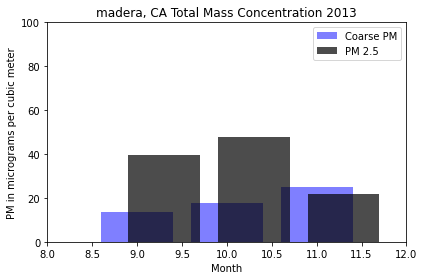

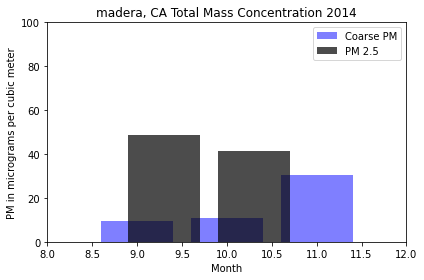

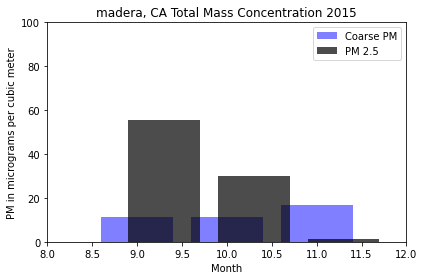

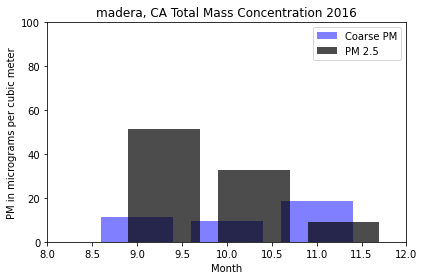

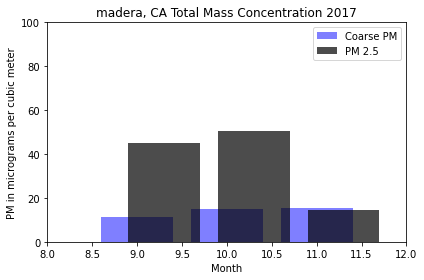

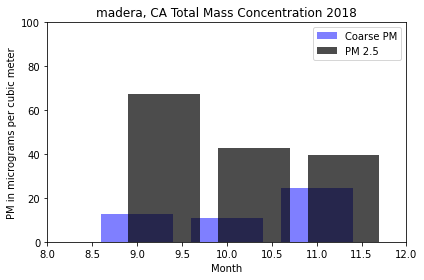

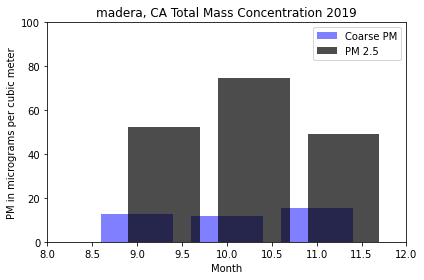

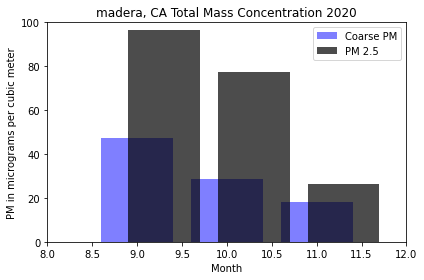

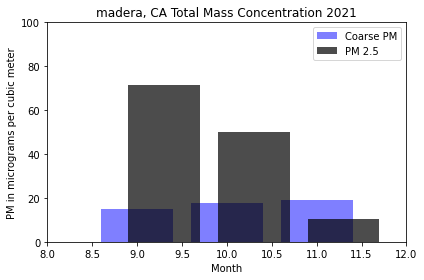

In [76]:
#madera tmc
#2013 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust1['month'], madera_pm25_annual_dust1['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust1['month'] + bar_width, madera_pm10_annual_dust1['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust2['month'], madera_pm25_annual_dust2['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust2['month'] + bar_width, madera_pm10_annual_dust2['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2014")
plt.legend()
plt.tight_layout()
plt.show()

madera_pm25_annual_dust2
#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust3['month'], madera_pm25_annual_dust3['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust3['month'] + bar_width, madera_pm10_annual_dust3['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2015")
plt.legend()
plt.tight_layout()
plt.show()

madera_pm25_annual_dust3
#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust4['month'], madera_pm25_annual_dust4['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust4['month'] + bar_width, madera_pm10_annual_dust4['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust5['month'], madera_pm25_annual_dust5['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust5['month'] + bar_width, madera_pm10_annual_dust5['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2017")
plt.legend()
plt.tight_layout()
plt.show() 

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust6['month'], madera_pm25_annual_dust6['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust6['month'] + bar_width, madera_pm10_annual_dust6['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2018")
plt.legend()
plt.tight_layout()
plt.show()


#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust7['month'], madera_pm25_annual_dust7['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust7['month'] + bar_width, madera_pm10_annual_dust7['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust8['month'], madera_pm25_annual_dust8['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust8['month'] + bar_width, madera_pm10_annual_dust8['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2020")
plt.legend()
plt.tight_layout()
plt.show()

##2021
fg, ax=plt.subplots()
#bar_width=0.3
opacity=0.7
plt.bar(madera_pm25_annual_dust9['month'], madera_pm25_annual_dust9['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(madera_pm10_annual_dust9['month'] + bar_width, madera_pm10_annual_dust9['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("madera, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

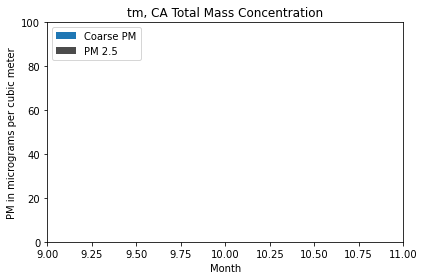

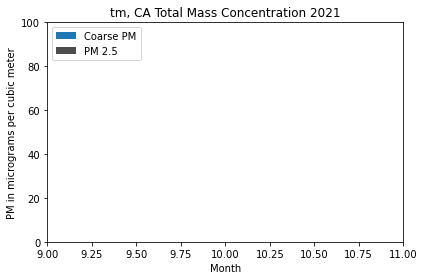

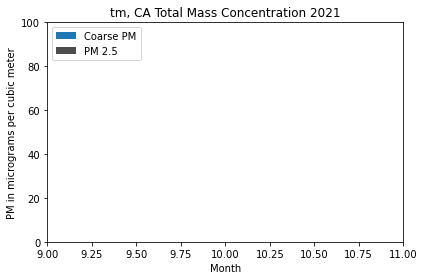

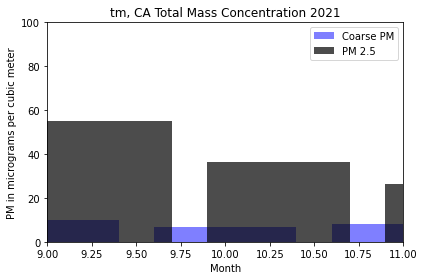

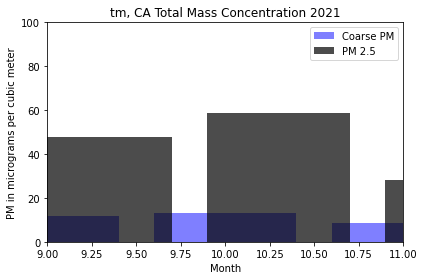

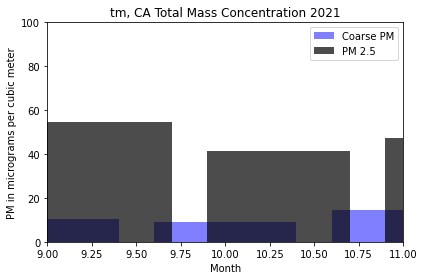

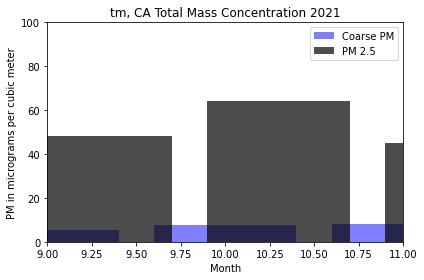

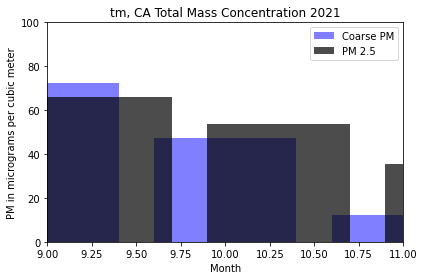

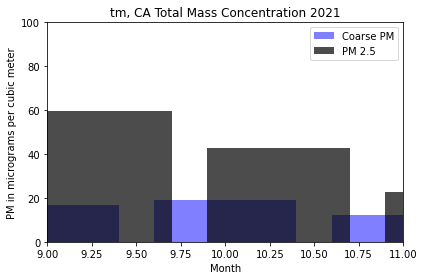

In [77]:
#tm tmc
#2013 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust1['month'], tm_pm25_annual_dust1['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust1['month'] + bar_width, tm_pm10_annual_dust1['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust2['month'], tm_pm25_annual_dust2['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust2['month'] + bar_width, tm_pm10_annual_dust2['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

tm_pm25_annual_dust2
#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust3['month'], tm_pm25_annual_dust3['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust3['month'] + bar_width, tm_pm10_annual_dust3['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

tm_pm25_annual_dust3
#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust4['month'], tm_pm25_annual_dust4['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust4['month'] + bar_width, tm_pm10_annual_dust4['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust5['month'], tm_pm25_annual_dust5['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust5['month'] + bar_width, tm_pm10_annual_dust5['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show() 

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust6['month'], tm_pm25_annual_dust6['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust6['month'] + bar_width, tm_pm10_annual_dust6['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()


#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust7['month'], tm_pm25_annual_dust7['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust7['month'] + bar_width, tm_pm10_annual_dust7['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust8['month'], tm_pm25_annual_dust8['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust8['month'] + bar_width, tm_pm10_annual_dust8['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

##2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm25_annual_dust9['month'], tm_pm25_annual_dust9['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(tm_pm10_annual_dust9['month'] + bar_width, tm_pm10_annual_dust9['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(9,11)
plt.title("tm, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

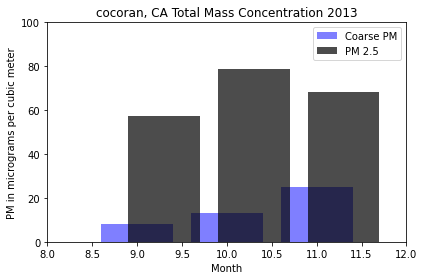

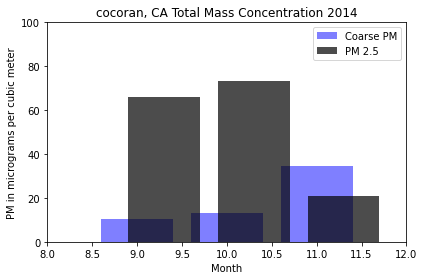

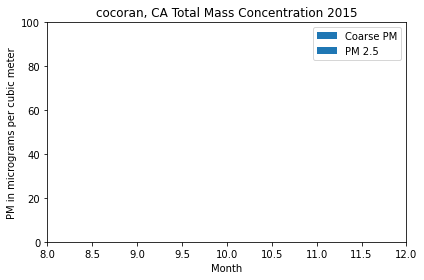

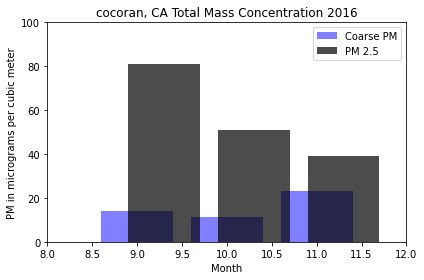

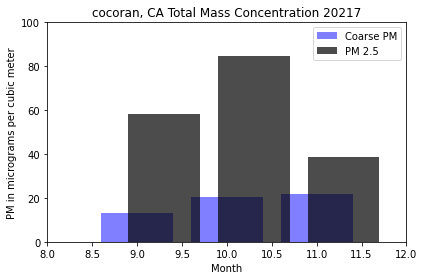

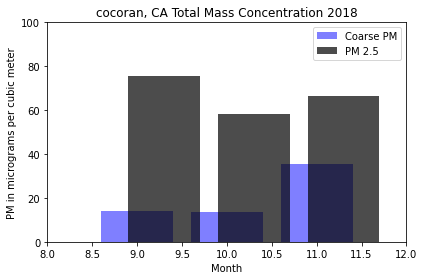

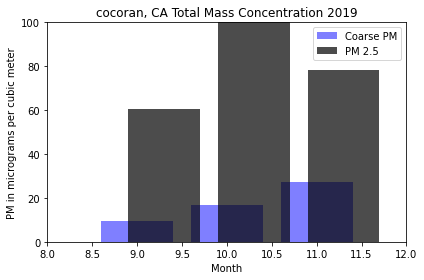

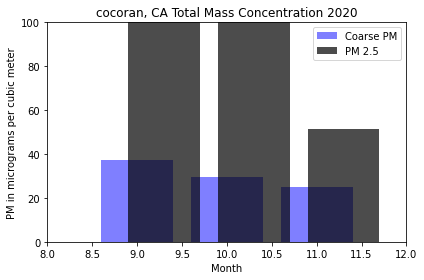

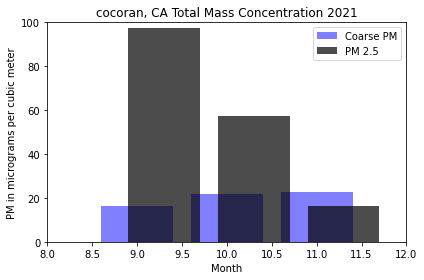

In [78]:
#cocoran tmc
#2013 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust1['month'], cocoran_pm25_annual_dust1['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust1['month'] + bar_width, cocoran_pm10_annual_dust1['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust2['month'], cocoran_pm25_annual_dust2['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust2['month'] + bar_width, cocoran_pm10_annual_dust2['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2014")
plt.legend()
plt.tight_layout()
plt.show()

cocoran_pm25_annual_dust2
#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust3['month'], cocoran_pm25_annual_dust3['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust3['month'] + bar_width, cocoran_pm10_annual_dust3['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2015")
plt.legend()
plt.tight_layout()
plt.show()

cocoran_pm25_annual_dust3
#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust4['month'], cocoran_pm25_annual_dust4['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust4['month'] + bar_width, cocoran_pm10_annual_dust4['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust5['month'], cocoran_pm25_annual_dust5['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust5['month'] + bar_width, cocoran_pm10_annual_dust5['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 20217")
plt.legend()
plt.tight_layout()
plt.show() 

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust6['month'], cocoran_pm25_annual_dust6['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust6['month'] + bar_width, cocoran_pm10_annual_dust6['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2018")
plt.legend()
plt.tight_layout()
plt.show()


#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust7['month'], cocoran_pm25_annual_dust7['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust7['month'] + bar_width, cocoran_pm10_annual_dust7['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust8['month'], cocoran_pm25_annual_dust8['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust8['month'] + bar_width, cocoran_pm10_annual_dust8['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2020")
plt.legend()
plt.tight_layout()
plt.show()

##2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm25_annual_dust9['month'], cocoran_pm25_annual_dust9['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(cocoran_pm10_annual_dust9['month'] + bar_width, cocoran_pm10_annual_dust9['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("cocoran, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

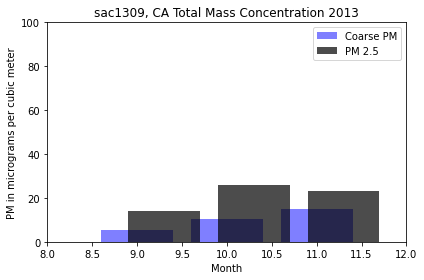

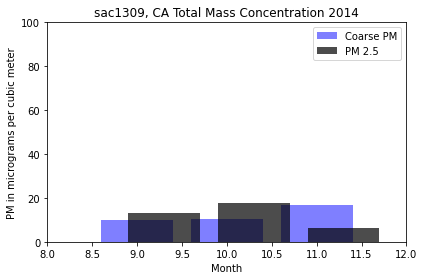

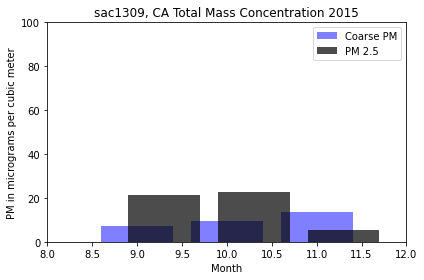

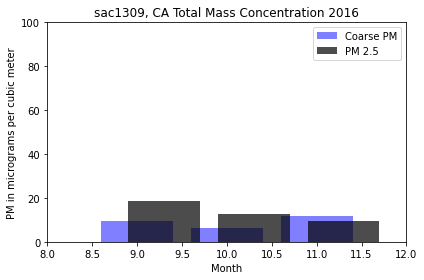

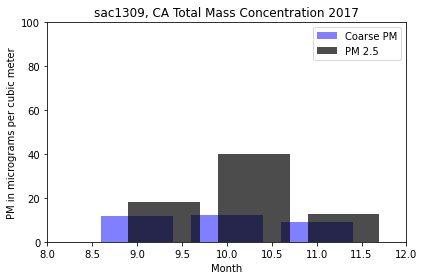

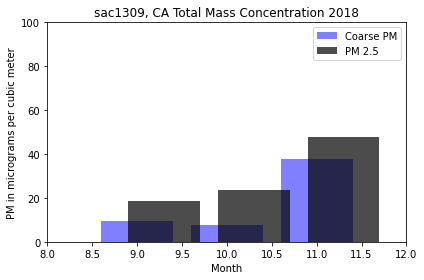

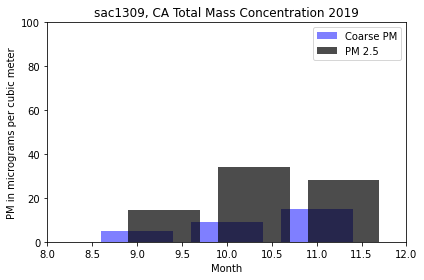

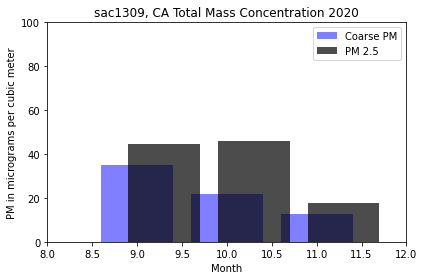

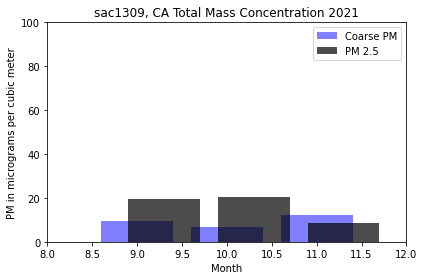

In [79]:
#sac tmc
#2013 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust1['month'], sac1309_pm25_annual_dust1['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust1['month'] + bar_width, sac1309_pm10_annual_dust1['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust2['month'], sac1309_pm25_annual_dust2['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust2['month'] + bar_width, sac1309_pm10_annual_dust2['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2014")
plt.legend()
plt.tight_layout()
plt.show()

sac1309_pm25_annual_dust2
#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust3['month'], sac1309_pm25_annual_dust3['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust3['month'] + bar_width, sac1309_pm10_annual_dust3['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2015")
plt.legend()
plt.tight_layout()
plt.show()

sac1309_pm25_annual_dust3
#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust4['month'], sac1309_pm25_annual_dust4['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust4['month'] + bar_width, sac1309_pm10_annual_dust4['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust5['month'], sac1309_pm25_annual_dust5['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust5['month'] + bar_width, sac1309_pm10_annual_dust5['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2017")
plt.legend()
plt.tight_layout()
plt.show() 

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust6['month'], sac1309_pm25_annual_dust6['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust6['month'] + bar_width, sac1309_pm10_annual_dust6['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2018")
plt.legend()
plt.tight_layout()
plt.show()


#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust7['month'], sac1309_pm25_annual_dust7['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust7['month'] + bar_width, sac1309_pm10_annual_dust7['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust8['month'], sac1309_pm25_annual_dust8['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust8['month'] + bar_width, sac1309_pm10_annual_dust8['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2020")
plt.legend()
plt.tight_layout()
plt.show()

##2021
fg, ax=plt.subplots()
#bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm25_annual_dust9['month'], sac1309_pm25_annual_dust9['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(sac1309_pm10_annual_dust9['month'] + bar_width, sac1309_pm10_annual_dust9['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("sac1309, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

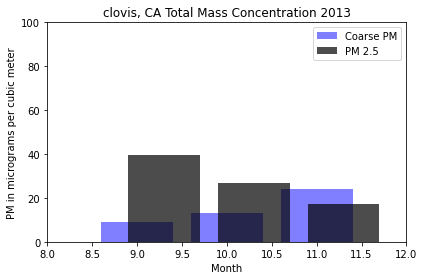

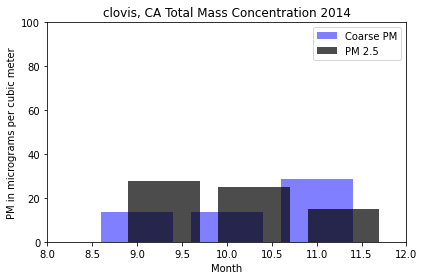

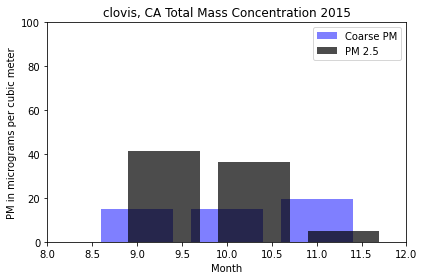

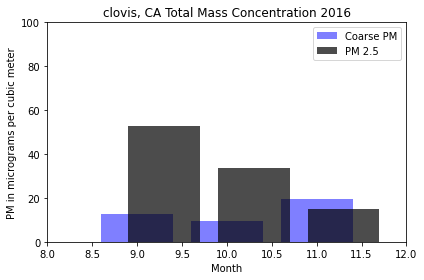

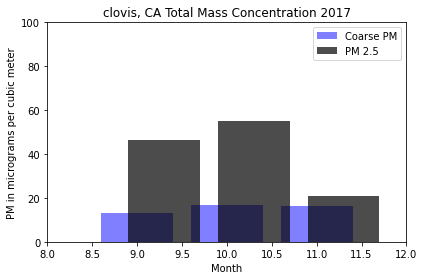

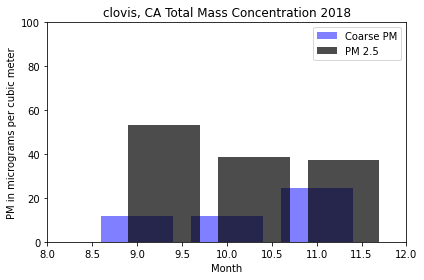

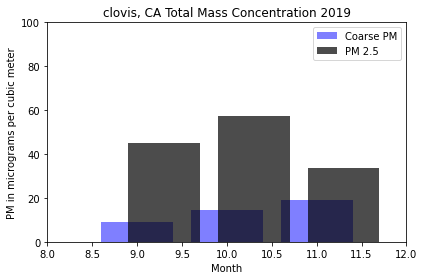

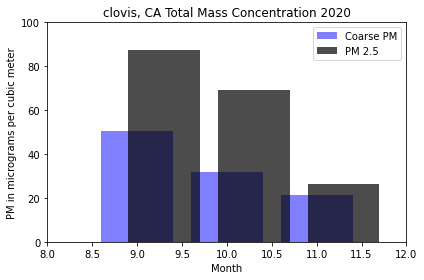

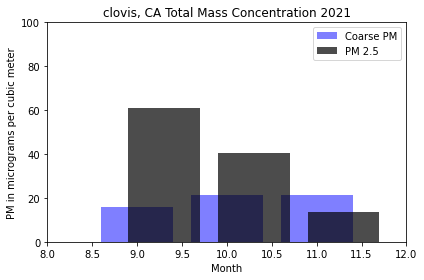

In [80]:
#clovis tmc
#2013 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust1['month'], clovis_pm25_annual_dust1['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust1['month'] + bar_width, clovis_pm10_annual_dust1['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust2['month'], clovis_pm25_annual_dust2['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust2['month'] + bar_width, clovis_pm10_annual_dust2['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2014")
plt.legend()
plt.tight_layout()
plt.show()

clovis_pm25_annual_dust2
#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust3['month'], clovis_pm25_annual_dust3['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust3['month'] + bar_width, clovis_pm10_annual_dust3['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2015")
plt.legend()
plt.tight_layout()
plt.show()

clovis_pm25_annual_dust3
#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust4['month'], clovis_pm25_annual_dust4['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust4['month'] + bar_width, clovis_pm10_annual_dust4['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust5['month'], clovis_pm25_annual_dust5['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust5['month'] + bar_width, clovis_pm10_annual_dust5['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2017")
plt.legend()
plt.tight_layout()
plt.show() 

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust6['month'], clovis_pm25_annual_dust6['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust6['month'] + bar_width, clovis_pm10_annual_dust6['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2018")
plt.legend()
plt.tight_layout()
plt.show()


#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust7['month'], clovis_pm25_annual_dust7['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust7['month'] + bar_width, clovis_pm10_annual_dust7['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust8['month'], clovis_pm25_annual_dust8['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust8['month'] + bar_width, clovis_pm10_annual_dust8['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2020")
plt.legend()
plt.tight_layout()
plt.show()

##2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm25_annual_dust9['month'], clovis_pm25_annual_dust9['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(clovis_pm10_annual_dust9['month'] + bar_width, clovis_pm10_annual_dust9['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("clovis, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

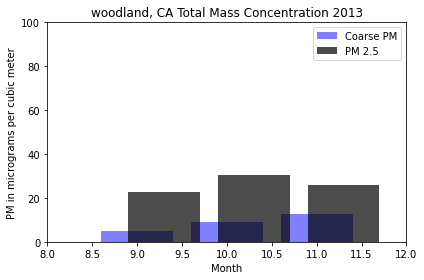

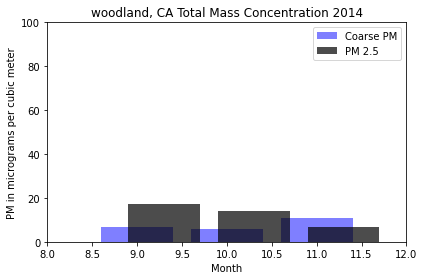

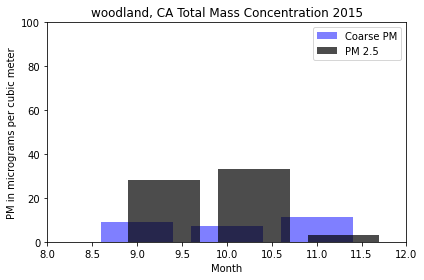

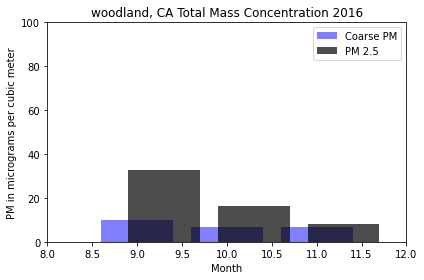

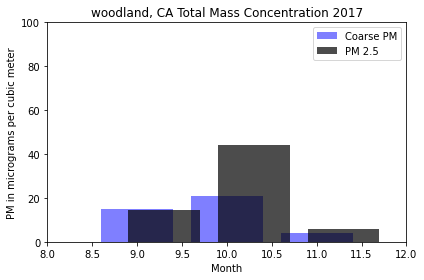

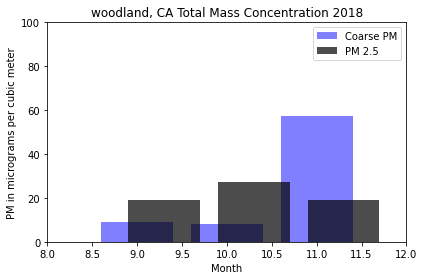

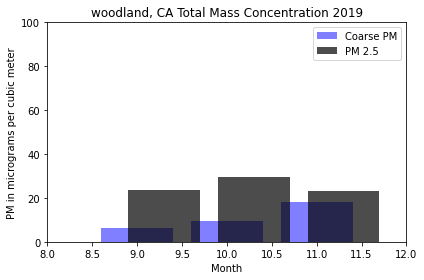

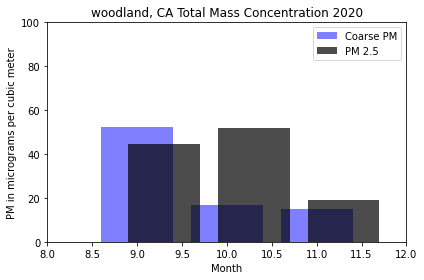

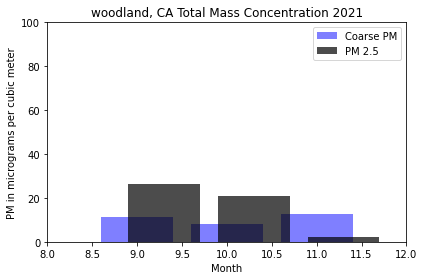

In [81]:
#woodland tmc
#2013 
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust1['month'], woodland_pm25_annual_dust1['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust1['month'] + bar_width, woodland_pm10_annual_dust1['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust2['month'], woodland_pm25_annual_dust2['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust2['month'] + bar_width, woodland_pm10_annual_dust2['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2014")
plt.legend()
plt.tight_layout()
plt.show()

woodland_pm25_annual_dust2
#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust3['month'], woodland_pm25_annual_dust3['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust3['month'] + bar_width, woodland_pm10_annual_dust3['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2015")
plt.legend()
plt.tight_layout()
plt.show()

woodland_pm25_annual_dust3
#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust4['month'], woodland_pm25_annual_dust4['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust4['month'] + bar_width, woodland_pm10_annual_dust4['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust5['month'], woodland_pm25_annual_dust5['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust5['month'] + bar_width, woodland_pm10_annual_dust5['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2017")
plt.legend()
plt.tight_layout()
plt.show() 

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust6['month'], woodland_pm25_annual_dust6['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust6['month'] + bar_width, woodland_pm10_annual_dust6['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2018")
plt.legend()
plt.tight_layout()
plt.show()


#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust7['month'], woodland_pm25_annual_dust7['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust7['month'] + bar_width, woodland_pm10_annual_dust7['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust8['month'], woodland_pm25_annual_dust8['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust8['month'] + bar_width, woodland_pm10_annual_dust8['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2020")
plt.legend()
plt.tight_layout()
plt.show()

##2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm25_annual_dust9['month'], woodland_pm25_annual_dust9['sample_measurement'], alpha=0.5, color='b', label='Coarse PM')
plt.bar(woodland_pm10_annual_dust9['month'] + bar_width, woodland_pm10_annual_dust9['Coarse_PM'], alpha=opacity, color='black', label="PM 2.5")
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2021")
plt.legend()
plt.tight_layout()
plt.show()

In [82]:
#making fractions for 2.5 to 10 ratio
woodland_pm10_annual_dust1['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust1.sample_measurement / woodland_pm10_annual_dust1.sample_measurement
woodland_pm10_annual_dust2['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust2.sample_measurement / woodland_pm10_annual_dust2.sample_measurement
woodland_pm10_annual_dust3['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust3.sample_measurement / woodland_pm10_annual_dust3.sample_measurement
woodland_pm10_annual_dust4['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust4.sample_measurement / woodland_pm10_annual_dust4.sample_measurement
woodland_pm10_annual_dust5['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust5.sample_measurement / woodland_pm10_annual_dust5.sample_measurement
woodland_pm10_annual_dust6['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust6.sample_measurement / woodland_pm10_annual_dust6.sample_measurement
woodland_pm10_annual_dust7['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust7.sample_measurement / woodland_pm10_annual_dust7.sample_measurement
woodland_pm10_annual_dust8['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust8.sample_measurement / woodland_pm10_annual_dust8.sample_measurement
woodland_pm10_annual_dust9['PM Ratio 2.5 to 10 x'] = woodland_pm25_annual_dust9.sample_measurement / woodland_pm10_annual_dust9.sample_measurement

In [83]:
#making fractions for 2.5 to 10 ratio
clovis_pm10_annual_dust1['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust1.sample_measurement / clovis_pm10_annual_dust1.sample_measurement
clovis_pm10_annual_dust2['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust2.sample_measurement / clovis_pm10_annual_dust2.sample_measurement
clovis_pm10_annual_dust3['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust3.sample_measurement / clovis_pm10_annual_dust3.sample_measurement
clovis_pm10_annual_dust4['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust4.sample_measurement / clovis_pm10_annual_dust4.sample_measurement
clovis_pm10_annual_dust5['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust5.sample_measurement / clovis_pm10_annual_dust5.sample_measurement
clovis_pm10_annual_dust6['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust6.sample_measurement / clovis_pm10_annual_dust6.sample_measurement
clovis_pm10_annual_dust7['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust7.sample_measurement / clovis_pm10_annual_dust7.sample_measurement
clovis_pm10_annual_dust8['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust8.sample_measurement / clovis_pm10_annual_dust8.sample_measurement
clovis_pm10_annual_dust9['PM Ratio 2.5 to 10 x'] = clovis_pm25_annual_dust9.sample_measurement / clovis_pm10_annual_dust9.sample_measurement

In [84]:
#making fractions for 2.5 to 10 ratio
cocoran_pm10_annual_dust1['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust1.sample_measurement / cocoran_pm10_annual_dust1.sample_measurement
cocoran_pm10_annual_dust2['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust2.sample_measurement / cocoran_pm10_annual_dust2.sample_measurement
cocoran_pm10_annual_dust3['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust3.sample_measurement / cocoran_pm10_annual_dust3.sample_measurement
cocoran_pm10_annual_dust4['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust4.sample_measurement / cocoran_pm10_annual_dust4.sample_measurement
cocoran_pm10_annual_dust5['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust5.sample_measurement / cocoran_pm10_annual_dust5.sample_measurement
cocoran_pm10_annual_dust6['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust6.sample_measurement / cocoran_pm10_annual_dust6.sample_measurement
cocoran_pm10_annual_dust7['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust7.sample_measurement / cocoran_pm10_annual_dust7.sample_measurement
cocoran_pm10_annual_dust8['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust8.sample_measurement / cocoran_pm10_annual_dust8.sample_measurement
cocoran_pm10_annual_dust9['PM Ratio 2.5 to 10 x'] = cocoran_pm25_annual_dust9.sample_measurement / cocoran_pm10_annual_dust9.sample_measurement

In [85]:
#making fractions for 2.5 to 10 ratio
tm_pm10_annual_dust1['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust1.sample_measurement / tm_pm10_annual_dust1.sample_measurement
tm_pm10_annual_dust2['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust2.sample_measurement / tm_pm10_annual_dust2.sample_measurement
tm_pm10_annual_dust3['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust3.sample_measurement / tm_pm10_annual_dust3.sample_measurement
tm_pm10_annual_dust4['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust4.sample_measurement / tm_pm10_annual_dust4.sample_measurement
tm_pm10_annual_dust5['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust5.sample_measurement / tm_pm10_annual_dust5.sample_measurement
tm_pm10_annual_dust6['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust6.sample_measurement / tm_pm10_annual_dust6.sample_measurement
tm_pm10_annual_dust7['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust7.sample_measurement / tm_pm10_annual_dust7.sample_measurement
tm_pm10_annual_dust8['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust8.sample_measurement / tm_pm10_annual_dust8.sample_measurement
tm_pm10_annual_dust9['PM Ratio 2.5 to 10 x'] = tm_pm25_annual_dust9.sample_measurement / tm_pm10_annual_dust9.sample_measurement

In [86]:
#making fractions for 2.5 to 10 ratio
sac1309_pm10_annual_dust1['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust1.sample_measurement / sac1309_pm10_annual_dust1.sample_measurement
sac1309_pm10_annual_dust2['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust2.sample_measurement / sac1309_pm10_annual_dust2.sample_measurement
sac1309_pm10_annual_dust3['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust3.sample_measurement / sac1309_pm10_annual_dust3.sample_measurement
sac1309_pm10_annual_dust4['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust4.sample_measurement / sac1309_pm10_annual_dust4.sample_measurement
sac1309_pm10_annual_dust5['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust5.sample_measurement / sac1309_pm10_annual_dust5.sample_measurement
sac1309_pm10_annual_dust6['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust6.sample_measurement / sac1309_pm10_annual_dust6.sample_measurement
sac1309_pm10_annual_dust7['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust7.sample_measurement / sac1309_pm10_annual_dust7.sample_measurement
sac1309_pm10_annual_dust8['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust8.sample_measurement / sac1309_pm10_annual_dust8.sample_measurement
sac1309_pm10_annual_dust9['PM Ratio 2.5 to 10 x'] = sac1309_pm25_annual_dust9.sample_measurement / sac1309_pm10_annual_dust9.sample_measurement

In [87]:
#making fractions for 2.5 to 10 ratio
madera_pm10_annual_dust1['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust1.sample_measurement / madera_pm10_annual_dust1.sample_measurement
madera_pm10_annual_dust2['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust2.sample_measurement / madera_pm10_annual_dust2.sample_measurement
madera_pm10_annual_dust3['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust3.sample_measurement / madera_pm10_annual_dust3.sample_measurement
madera_pm10_annual_dust4['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust4.sample_measurement / madera_pm10_annual_dust4.sample_measurement
madera_pm10_annual_dust5['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust5.sample_measurement / madera_pm10_annual_dust5.sample_measurement
madera_pm10_annual_dust6['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust6.sample_measurement / madera_pm10_annual_dust6.sample_measurement
madera_pm10_annual_dust7['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust7.sample_measurement / madera_pm10_annual_dust7.sample_measurement
madera_pm10_annual_dust8['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust8.sample_measurement / madera_pm10_annual_dust8.sample_measurement
madera_pm10_annual_dust9['PM Ratio 2.5 to 10 x'] = madera_pm25_annual_dust9.sample_measurement / madera_pm10_annual_dust9.sample_measurement

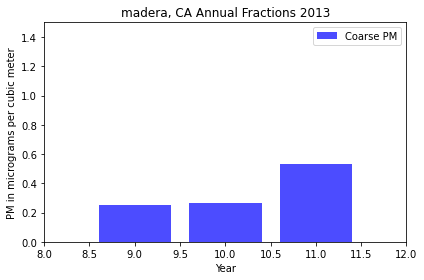

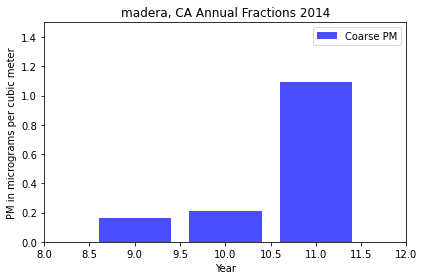

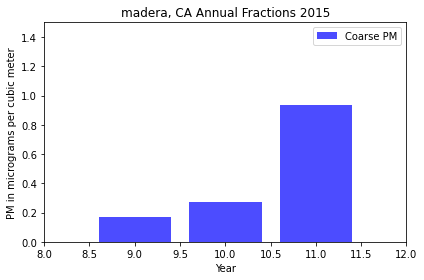

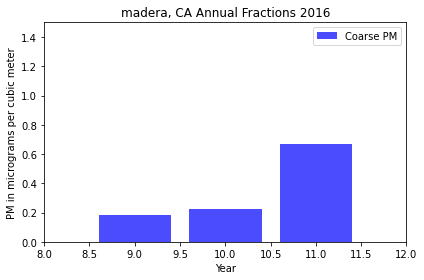

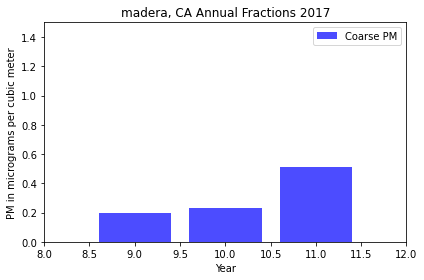

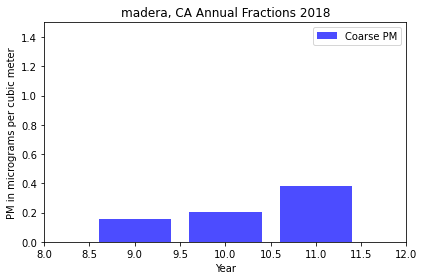

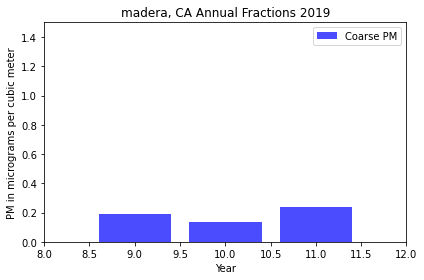

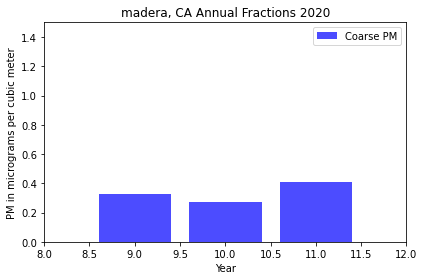

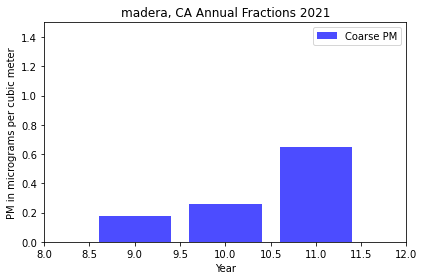

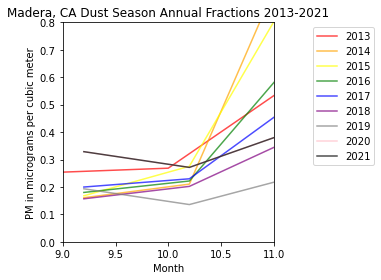

In [88]:
#graphing annual fractions madera
#2013
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust1['month'], madera_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust2['month'], madera_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2014")
plt.legend()
plt.tight_layout()
plt.show()

#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust3['month'], madera_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2015")
plt.legend()
plt.tight_layout()
plt.show()

#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust4['month'], madera_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust5['month'], madera_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2017")
plt.legend()
plt.tight_layout()
plt.show()

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust6['month'], madera_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2018")
plt.legend()
plt.tight_layout()
plt.show()

#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust7['month'], madera_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust8['month'], madera_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2020")
plt.legend()
plt.tight_layout()
plt.show()

#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(madera_pm10_annual_dust9['month'], madera_pm10_annual_dust9['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("madera, CA Annual Fractions 2021")
plt.legend()
plt.tight_layout()
plt.show()

#big graph
fg, ax=plt.subplots()
bar_width=0.2
opacity=0.7
plt.plot(madera_pm10_annual_dust1['month'], madera_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='red', label='2013')
plt.plot(madera_pm10_annual_dust2['month'] + bar_width, madera_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='orange', label="2014")
plt.plot(madera_pm10_annual_dust3['month'] + bar_width, madera_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='yellow', label="2015")
plt.plot(madera_pm10_annual_dust4['month'] + bar_width, madera_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='green', label="2016")
plt.plot(madera_pm10_annual_dust5['month'] + bar_width, madera_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='blue', label="2017")
plt.plot(madera_pm10_annual_dust6['month'] + bar_width, madera_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='purple', label="2018")
plt.plot(madera_pm10_annual_dust7['month'] + bar_width, madera_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='grey', label="2019")
plt.plot(madera_pm10_annual_dust8['month'] + bar_width, madera_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='pink', label="2020")
plt.plot(madera_pm10_annual_dust9['month'] + bar_width, madera_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='black', label="2021")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,0.8)
plt.xlim(9,11)
plt.title("Madera, CA Dust Season Annual Fractions 2013-2021")
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()


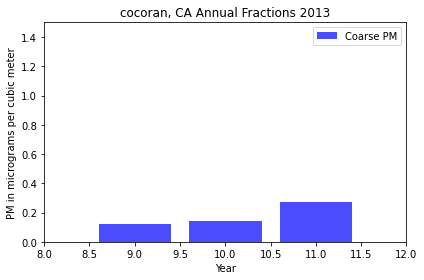

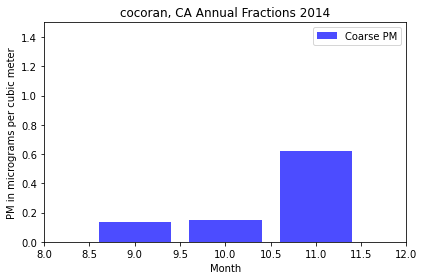

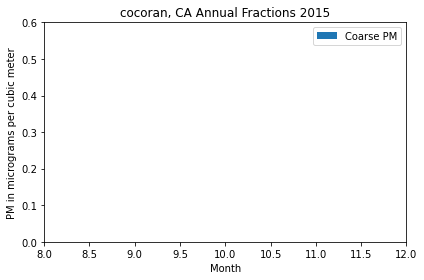

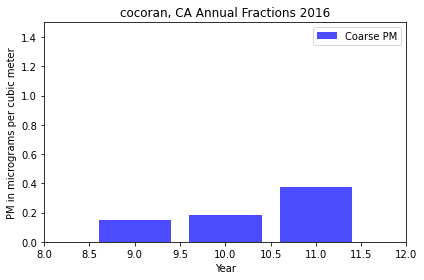

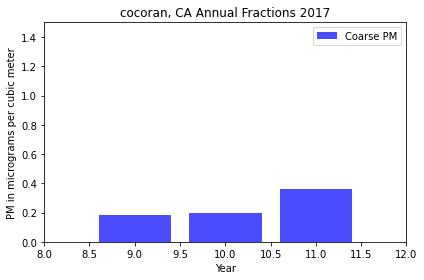

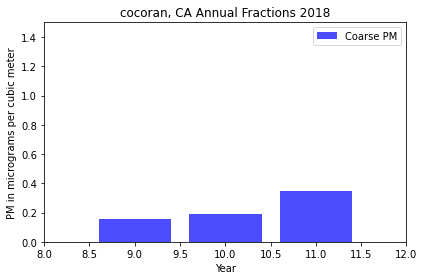

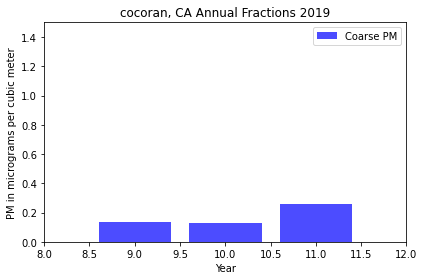

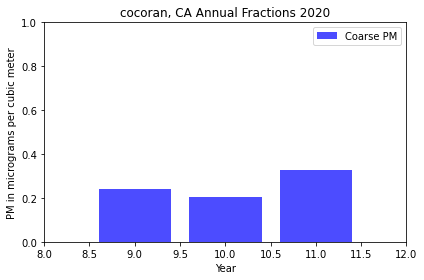

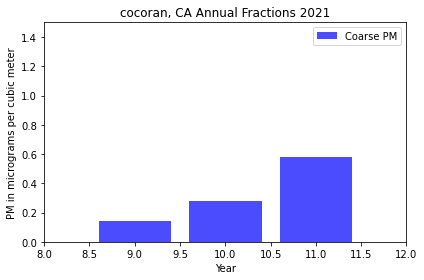

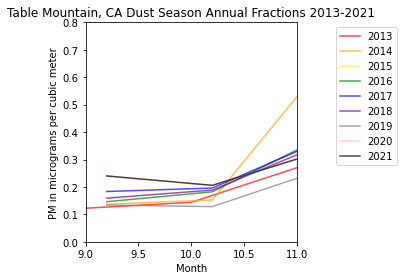

In [89]:
#graphing annual fractions cocoran
#2013
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust1['month'], cocoran_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust2['month'], cocoran_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2014")
plt.legend()
plt.tight_layout()
plt.show()

#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust3['month'], cocoran_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,0.6)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2015")
plt.legend()
plt.tight_layout()
plt.show()

#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust4['month'], cocoran_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust5['month'], cocoran_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2017")
plt.legend()
plt.tight_layout()
plt.show()

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust6['month'], cocoran_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2018")
plt.legend()
plt.tight_layout()
plt.show()

#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust7['month'], cocoran_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust8['month'], cocoran_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2020")
plt.legend()
plt.tight_layout()
plt.show()

#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(cocoran_pm10_annual_dust9['month'], cocoran_pm10_annual_dust9['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("cocoran, CA Annual Fractions 2021")
plt.legend()
plt.tight_layout()
plt.show()

#big graph
fg, ax=plt.subplots()
bar_width=0.2
opacity=0.7
plt.plot(cocoran_pm10_annual_dust1['month'], cocoran_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='red', label='2013')
plt.plot(cocoran_pm10_annual_dust2['month'] + bar_width, cocoran_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='orange', label="2014")
plt.plot(cocoran_pm10_annual_dust3['month'] + bar_width, cocoran_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='yellow', label="2015")
plt.plot(cocoran_pm10_annual_dust4['month'] + bar_width, cocoran_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='green', label="2016")
plt.plot(cocoran_pm10_annual_dust5['month'] + bar_width, cocoran_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='blue', label="2017")
plt.plot(cocoran_pm10_annual_dust6['month'] + bar_width, cocoran_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='purple', label="2018")
plt.plot(cocoran_pm10_annual_dust7['month'] + bar_width, cocoran_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='grey', label="2019")
plt.plot(cocoran_pm10_annual_dust8['month'] + bar_width, cocoran_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='pink', label="2020")
plt.plot(cocoran_pm10_annual_dust9['month'] + bar_width, cocoran_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='black', label="2021")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,0.8)
plt.xlim(9,11)
plt.title("Table Mountain, CA Dust Season Annual Fractions 2013-2021")
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()


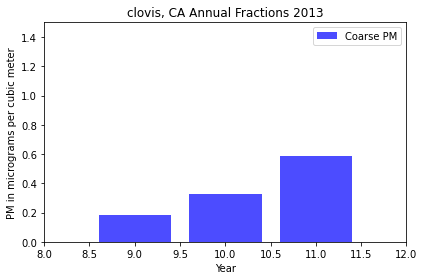

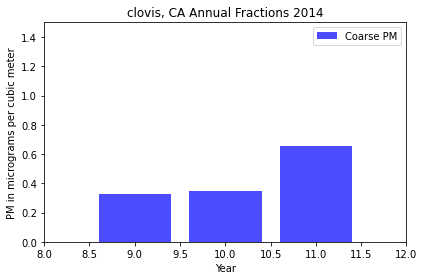

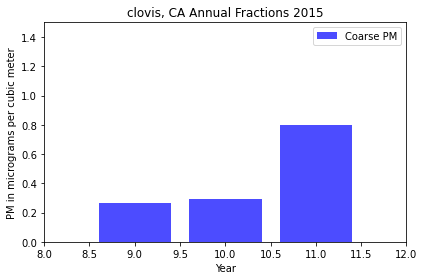

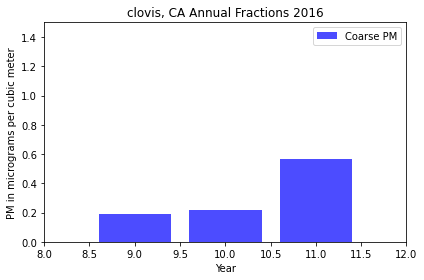

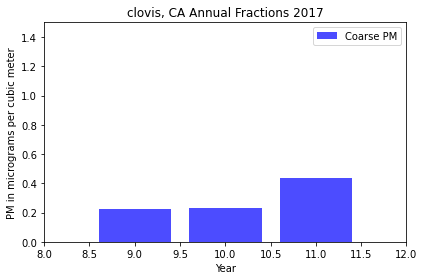

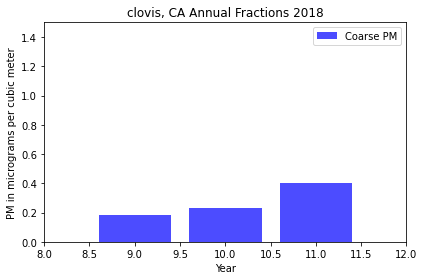

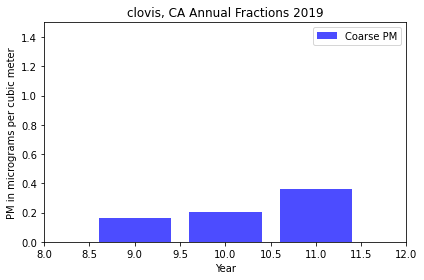

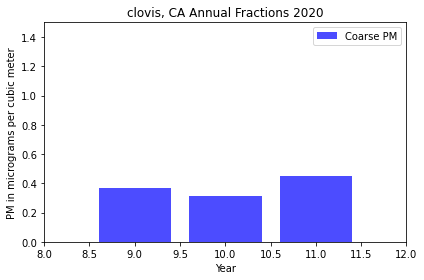

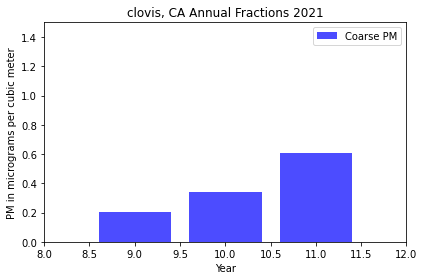

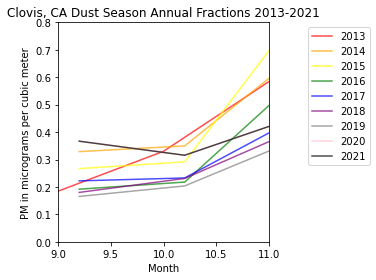

In [90]:
#graphing annual fractions clovis
#2013
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust1['month'], clovis_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust2['month'], clovis_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2014")
plt.legend()
plt.tight_layout()
plt.show()

#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust3['month'], clovis_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2015")
plt.legend()
plt.tight_layout()
plt.show()

#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust4['month'], clovis_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust5['month'], clovis_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2017")
plt.legend()
plt.tight_layout()
plt.show()

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust6['month'], clovis_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2018")
plt.legend()
plt.tight_layout()
plt.show()

#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust7['month'], clovis_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust8['month'], clovis_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2020")
plt.legend()
plt.tight_layout()
plt.show()

#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(clovis_pm10_annual_dust9['month'], clovis_pm10_annual_dust9['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("clovis, CA Annual Fractions 2021")
plt.legend()
plt.tight_layout()
plt.show()

#big graph
fg, ax=plt.subplots()
bar_width=0.2
opacity=0.7
plt.plot(clovis_pm10_annual_dust1['month'], clovis_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='red', label='2013')
plt.plot(clovis_pm10_annual_dust2['month'] + bar_width, clovis_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='orange', label="2014")
plt.plot(clovis_pm10_annual_dust3['month'] + bar_width, clovis_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='yellow', label="2015")
plt.plot(clovis_pm10_annual_dust4['month'] + bar_width, clovis_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='green', label="2016")
plt.plot(clovis_pm10_annual_dust5['month'] + bar_width, clovis_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='blue', label="2017")
plt.plot(clovis_pm10_annual_dust6['month'] + bar_width, clovis_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='purple', label="2018")
plt.plot(clovis_pm10_annual_dust7['month'] + bar_width, clovis_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='grey', label="2019")
plt.plot(clovis_pm10_annual_dust8['month'] + bar_width, clovis_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='pink', label="2020")
plt.plot(clovis_pm10_annual_dust9['month'] + bar_width, clovis_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='black', label="2021")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,0.8)
plt.xlim(9,11)
plt.title("Clovis, CA Dust Season Annual Fractions 2013-2021")
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()


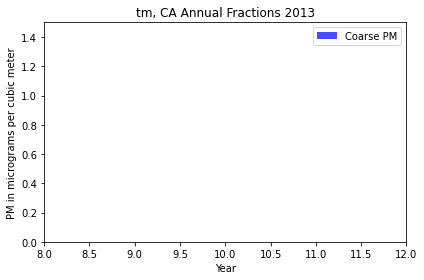

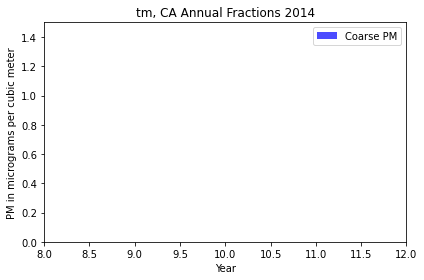

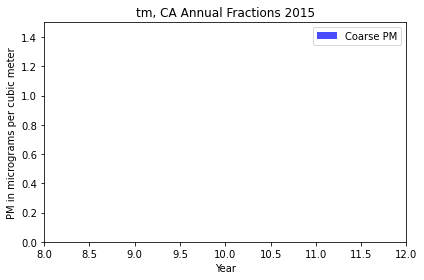

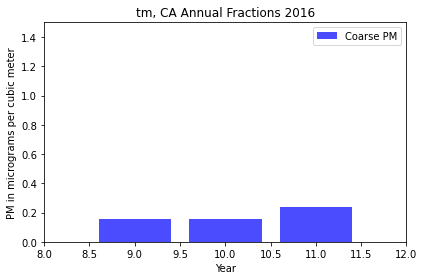

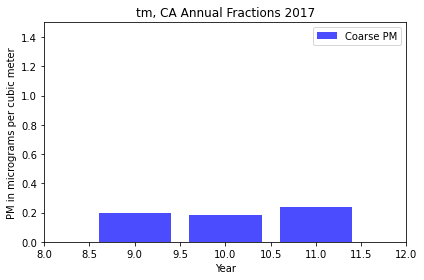

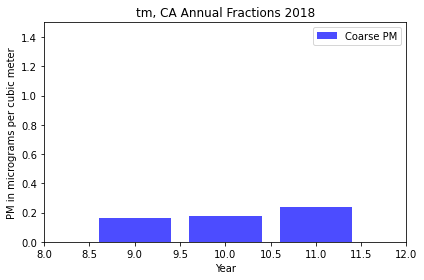

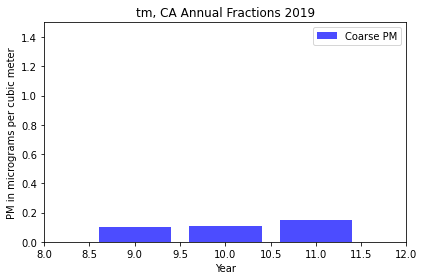

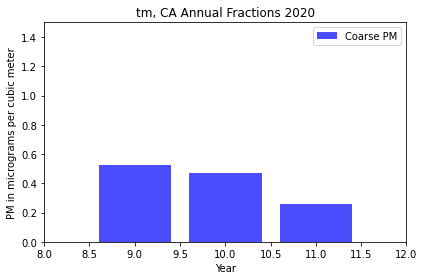

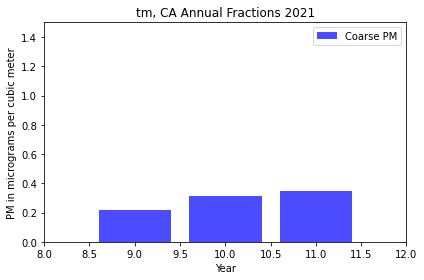

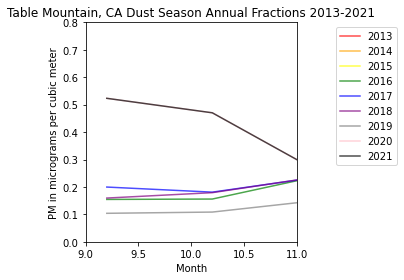

In [91]:
#graphing annual fractions tm
#2013
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust1['month'], tm_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust2['month'], tm_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2014")
plt.legend()
plt.tight_layout()
plt.show()

#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust3['month'], tm_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2015")
plt.legend()
plt.tight_layout()
plt.show()

#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust4['month'], tm_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust5['month'], tm_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2017")
plt.legend()
plt.tight_layout()
plt.show()

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust6['month'], tm_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2018")
plt.legend()
plt.tight_layout()
plt.show()

#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust7['month'], tm_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust8['month'], tm_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2020")
plt.legend()
plt.tight_layout()
plt.show()

#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(tm_pm10_annual_dust9['month'], tm_pm10_annual_dust9['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("tm, CA Annual Fractions 2021")
plt.legend()
plt.tight_layout()
plt.show()

#big graph
fg, ax=plt.subplots()
bar_width=0.2
opacity=0.7
plt.plot(tm_pm10_annual_dust1['month'], tm_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='red', label='2013')
plt.plot(tm_pm10_annual_dust2['month'] + bar_width, tm_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='orange', label="2014")
plt.plot(tm_pm10_annual_dust3['month'] + bar_width, tm_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='yellow', label="2015")
plt.plot(tm_pm10_annual_dust4['month'] + bar_width, tm_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='green', label="2016")
plt.plot(tm_pm10_annual_dust5['month'] + bar_width, tm_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='blue', label="2017")
plt.plot(tm_pm10_annual_dust6['month'] + bar_width, tm_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='purple', label="2018")
plt.plot(tm_pm10_annual_dust7['month'] + bar_width, tm_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='grey', label="2019")
plt.plot(tm_pm10_annual_dust8['month'] + bar_width, tm_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='pink', label="2020")
plt.plot(tm_pm10_annual_dust9['month'] + bar_width, tm_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='black', label="2021")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,0.8)
plt.xlim(9,11)
plt.title("Table Mountain, CA Dust Season Annual Fractions 2013-2021")
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()



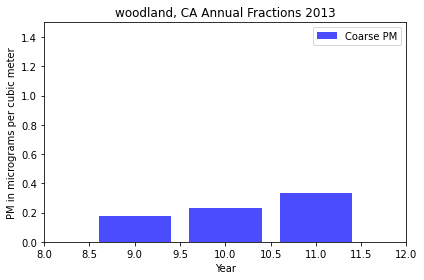

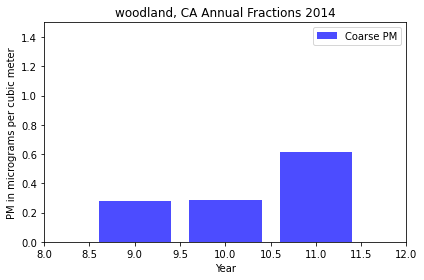

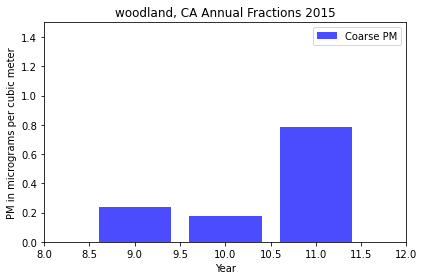

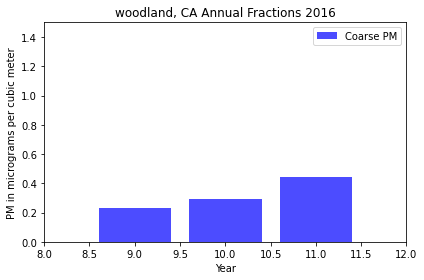

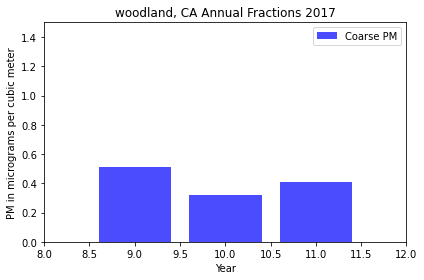

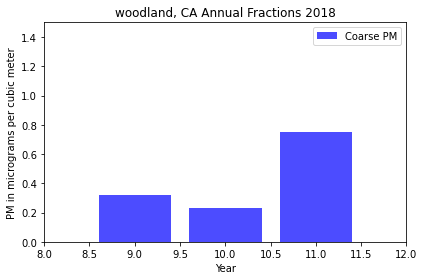

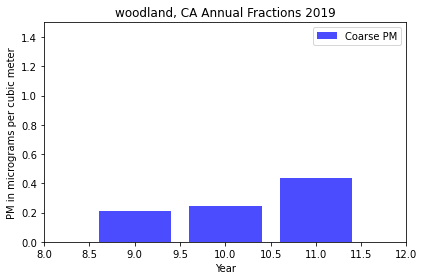

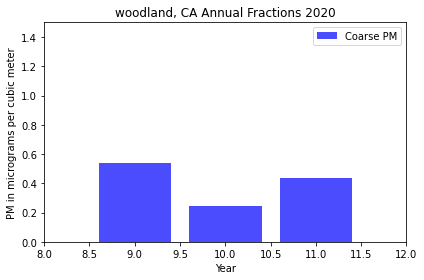

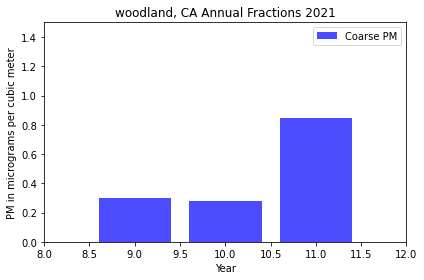

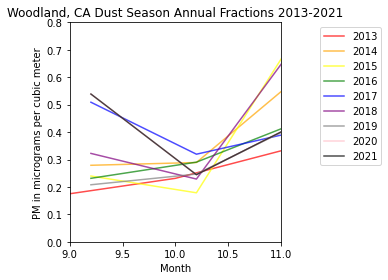

In [92]:
#graphing annual fractions woodland
#2013
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust1['month'], woodland_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust2['month'], woodland_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2014")
plt.legend()
plt.tight_layout()
plt.show()

#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust3['month'], woodland_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2015")
plt.legend()
plt.tight_layout()
plt.show()

#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust4['month'], woodland_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust5['month'], woodland_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2017")
plt.legend()
plt.tight_layout()
plt.show()

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust6['month'], woodland_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2018")
plt.legend()
plt.tight_layout()
plt.show()

#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust7['month'], woodland_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust8['month'], woodland_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2020")
plt.legend()
plt.tight_layout()
plt.show()

#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(woodland_pm10_annual_dust9['month'], woodland_pm10_annual_dust9['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("woodland, CA Annual Fractions 2021")
plt.legend()
plt.tight_layout()
plt.show()

#big graph
fg, ax=plt.subplots()
bar_width=0.2
opacity=0.7
plt.plot(woodland_pm10_annual_dust1['month'], woodland_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='red', label='2013')
plt.plot(woodland_pm10_annual_dust2['month'] + bar_width, woodland_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='orange', label="2014")
plt.plot(woodland_pm10_annual_dust3['month'] + bar_width, woodland_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='yellow', label="2015")
plt.plot(woodland_pm10_annual_dust4['month'] + bar_width, woodland_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='green', label="2016")
plt.plot(woodland_pm10_annual_dust5['month'] + bar_width, woodland_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='blue', label="2017")
plt.plot(woodland_pm10_annual_dust6['month'] + bar_width, woodland_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='purple', label="2018")
plt.plot(woodland_pm10_annual_dust7['month'] + bar_width, woodland_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='grey', label="2019")
plt.plot(woodland_pm10_annual_dust8['month'] + bar_width, woodland_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='pink', label="2020")
plt.plot(woodland_pm10_annual_dust9['month'] + bar_width, woodland_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='black', label="2021")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,0.8)
plt.xlim(9,11)
plt.title("Woodland, CA Dust Season Annual Fractions 2013-2021")
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()



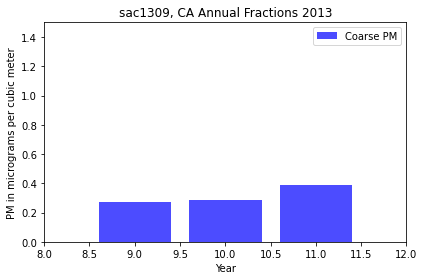

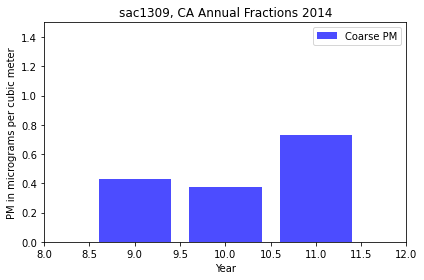

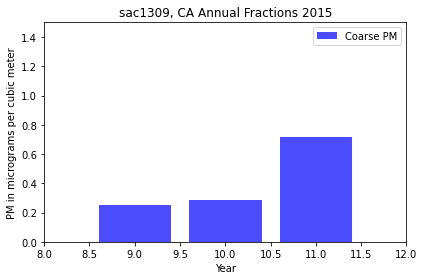

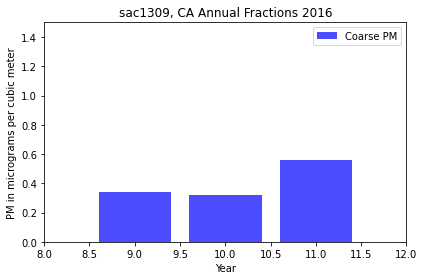

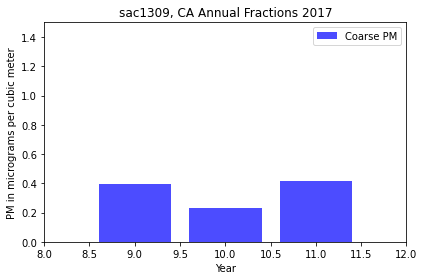

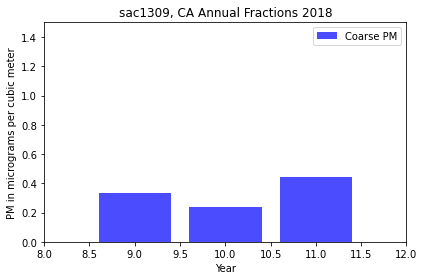

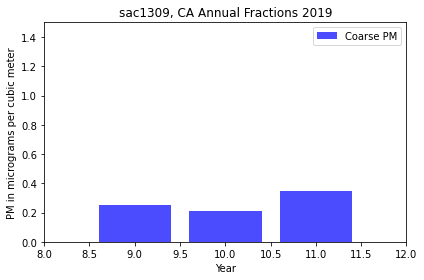

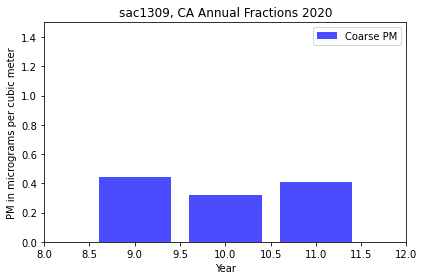

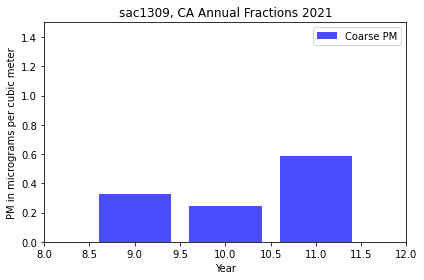

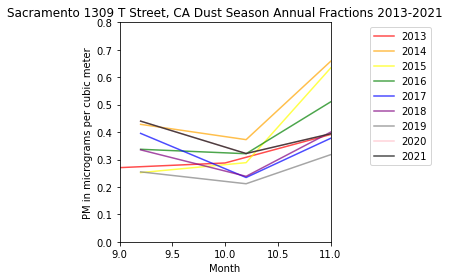

In [93]:
#graphing annual fractions sac1309
#2013
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust1['month'], sac1309_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2013")
plt.legend()
plt.tight_layout()
plt.show()

#2014
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust2['month'], sac1309_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2014")
plt.legend()
plt.tight_layout()
plt.show()

#2015
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust3['month'], sac1309_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2015")
plt.legend()
plt.tight_layout()
plt.show()

#2016
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust4['month'], sac1309_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2016")
plt.legend()
plt.tight_layout()
plt.show()

#2017
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust5['month'], sac1309_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2017")
plt.legend()
plt.tight_layout()
plt.show()

#2018
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust6['month'], sac1309_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2018")
plt.legend()
plt.tight_layout()
plt.show()

#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust7['month'], sac1309_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2019")
plt.legend()
plt.tight_layout()
plt.show()

#2020
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust8['month'], sac1309_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2020")
plt.legend()
plt.tight_layout()
plt.show()

#2021
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
plt.bar(sac1309_pm10_annual_dust9['month'], sac1309_pm10_annual_dust9['PM Ratio 2.5 to 10 x'], alpha=opacity, color='b', label='Coarse PM')
plt.xlabel('Year')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,1.5)
plt.xlim(8,12)
plt.title("sac1309, CA Annual Fractions 2021")
plt.legend()
plt.tight_layout()
plt.show()

#big graph
fg, ax=plt.subplots()
bar_width=0.2
opacity=0.7
plt.plot(sac1309_pm10_annual_dust1['month'], sac1309_pm10_annual_dust1['PM Ratio 2.5 to 10 x'], alpha=opacity, color='red', label='2013')
plt.plot(sac1309_pm10_annual_dust2['month'] + bar_width, sac1309_pm10_annual_dust2['PM Ratio 2.5 to 10 x'], alpha=opacity, color='orange', label="2014")
plt.plot(sac1309_pm10_annual_dust3['month'] + bar_width, sac1309_pm10_annual_dust3['PM Ratio 2.5 to 10 x'], alpha=opacity, color='yellow', label="2015")
plt.plot(sac1309_pm10_annual_dust4['month'] + bar_width, sac1309_pm10_annual_dust4['PM Ratio 2.5 to 10 x'], alpha=opacity, color='green', label="2016")
plt.plot(sac1309_pm10_annual_dust5['month'] + bar_width, sac1309_pm10_annual_dust5['PM Ratio 2.5 to 10 x'], alpha=opacity, color='blue', label="2017")
plt.plot(sac1309_pm10_annual_dust6['month'] + bar_width, sac1309_pm10_annual_dust6['PM Ratio 2.5 to 10 x'], alpha=opacity, color='purple', label="2018")
plt.plot(sac1309_pm10_annual_dust7['month'] + bar_width, sac1309_pm10_annual_dust7['PM Ratio 2.5 to 10 x'], alpha=opacity, color='grey', label="2019")
plt.plot(sac1309_pm10_annual_dust8['month'] + bar_width, sac1309_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='pink', label="2020")
plt.plot(sac1309_pm10_annual_dust9['month'] + bar_width, sac1309_pm10_annual_dust8['PM Ratio 2.5 to 10 x'], alpha=opacity, color='black', label="2021")
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,0.8)
plt.xlim(9,11)
plt.title("Sacramento 1309 T Street, CA Dust Season Annual Fractions 2013-2021")
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.tight_layout()
plt.show()



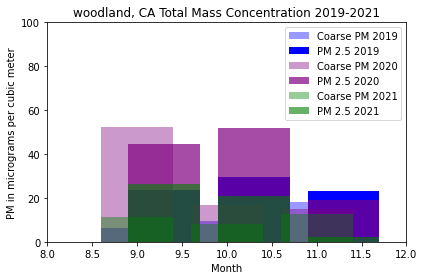

In [94]:
#Plotting sacramento sites for 2019-2021 total mass conc

#woodland
#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
#2019
plt.bar(woodland_pm25_annual_dust7['month'], woodland_pm25_annual_dust7['sample_measurement'], alpha=0.4, color='blue', label='Coarse PM 2019')
plt.bar(woodland_pm10_annual_dust7['month'] + bar_width, woodland_pm10_annual_dust7['Coarse_PM'], alpha=1, color='blue', label="PM 2.5 2019")
#2020
plt.bar(woodland_pm25_annual_dust8['month'], woodland_pm25_annual_dust8['sample_measurement'], alpha=0.4, color='purple', label='Coarse PM 2020')
plt.bar(woodland_pm10_annual_dust8['month'] + bar_width, woodland_pm10_annual_dust8['Coarse_PM'], alpha=.7, color='purple', label="PM 2.5 2020")
#2021
plt.bar(woodland_pm25_annual_dust9['month'], woodland_pm25_annual_dust9['sample_measurement'], alpha=0.4, color='green', label='Coarse PM 2021')
plt.bar(woodland_pm10_annual_dust9['month'] + bar_width, woodland_pm10_annual_dust9['Coarse_PM'], alpha=.6, color='green', label="PM 2.5 2021")
#plotting
plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,100)
plt.xlim(8,12)
plt.title("woodland, CA Total Mass Concentration 2019-2021")
plt.legend()
plt.tight_layout()
plt.show()





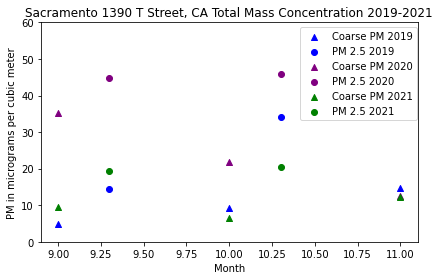

In [95]:
#sac
#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
#2019
plt.scatter(sac1309_pm25_annual_dust7['month'], sac1309_pm25_annual_dust7['sample_measurement'], alpha=1, color='blue', label='Coarse PM 2019',marker='^')
plt.scatter(sac1309_pm10_annual_dust7['month'] + bar_width, sac1309_pm10_annual_dust7['Coarse_PM'], alpha=1, color='blue', label="PM 2.5 2019")
#2020
plt.scatter(sac1309_pm25_annual_dust8['month'], sac1309_pm25_annual_dust8['sample_measurement'], alpha=1, color='purple', label='Coarse PM 2020',marker='^')
plt.scatter(sac1309_pm10_annual_dust8['month'] + bar_width, sac1309_pm10_annual_dust8['Coarse_PM'], alpha=1, color='purple', label="PM 2.5 2020")
#2021
plt.scatter(sac1309_pm25_annual_dust9['month'], sac1309_pm25_annual_dust9['sample_measurement'], alpha=1, color='green', label='Coarse PM 2021', marker='^')
plt.scatter(sac1309_pm10_annual_dust9['month'] + bar_width, sac1309_pm10_annual_dust9['Coarse_PM'], alpha=1, color='green', label="PM 2.5 2021")
#plotting
#plt.scatter(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,60)
plt.xlim(8.9,11.1)
plt.title("Sacramento 1390 T Street, CA Total Mass Concentration 2019-2021")
plt.legend(bbox_to_anchor=(1.011, 1.0))
plt.tight_layout()
plt.show()




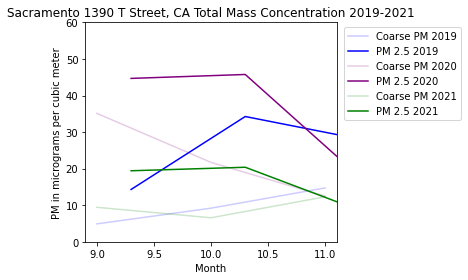

In [96]:
#sac
#2019
fg, ax=plt.subplots()
bar_width=0.3
opacity=0.7
#2019
plt.plot(sac1309_pm25_annual_dust7['month'], sac1309_pm25_annual_dust7['sample_measurement'], alpha=.2, color='blue', label='Coarse PM 2019')
plt.plot(sac1309_pm10_annual_dust7['month'] + bar_width, sac1309_pm10_annual_dust7['Coarse_PM'], alpha=1, color='blue', label="PM 2.5 2019")
#2020
plt.plot(sac1309_pm25_annual_dust8['month'], sac1309_pm25_annual_dust8['sample_measurement'], alpha=.2, color='purple', label='Coarse PM 2020')
plt.plot(sac1309_pm10_annual_dust8['month'] + bar_width, sac1309_pm10_annual_dust8['Coarse_PM'], alpha=1, color='purple', label="PM 2.5 2020")
#2021
plt.plot(sac1309_pm25_annual_dust9['month'], sac1309_pm25_annual_dust9['sample_measurement'], alpha=.2, color='green', label='Coarse PM 2021')
plt.plot(sac1309_pm10_annual_dust9['month'] + bar_width, sac1309_pm10_annual_dust9['Coarse_PM'], alpha=1, color='green', label="PM 2.5 2021")
#plotting
#plt.plot(kind="bar",stacked=True)
plt.xlabel('Month')
plt.ylabel('PM in micrograms per cubic meter')
plt.ylim(0,60)
plt.xlim(8.9,11.1)
plt.title("Sacramento 1390 T Street, CA Total Mass Concentration 2019-2021")
plt.legend(bbox_to_anchor=(1.011, 1.0))
plt.tight_layout()
plt.show()


